In [2]:
"""
BantAI Unified Risk-Based Authentication System
Combines ML-based risk assessment with travel-aware intelligence

Integration Strategy:
- ML Model (BantAI_RBA_Model) provides base risk assessment
- Travel Intelligence (BantAI_TravelAware) provides travel context
- Unified system combines both for final decision
- Maintains explainability and Filipino context
"""

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Import the individual systems (assuming they're in separate modules)
# from bantai_rba_model import BantAI_RBA_Model
# from bantai_travel_aware import BantAI_TravelAware

class BantAI_UnifiedSystem:
    """
    Unified BantAI System combining ML-based RBA with Travel Intelligence
    
    Architecture:
    1. ML Model provides base risk assessment (0-1 score)
    2. Travel Intelligence analyzes geographic/temporal plausibility
    3. Behavioral Consistency checks user patterns
    4. Final risk score combines all components
    5. Explainable decisions with multilingual support
    """
    
    def __init__(self):
        # Initialize component systems
        self.ml_rba_model = None  # Will be initialized with BantAI_RBA_Model
        self.travel_intelligence = None  # Will be initialized with BantAI_TravelAware
        
        # Unified system components
        self.scaler = StandardScaler()
        self.is_trained = False
        self.user_profiles = {}
        
        # Integration weights for final risk calculation
        self.component_weights = {
            'ml_base_risk': 0.4,          # ML model base prediction
            'travel_risk': 0.3,           # Travel plausibility analysis
            'behavioral_risk': 0.2,       # Behavioral consistency
            'technical_risk': 0.1         # Technical indicators (IP, device, etc.)
        }
        
        # Load Filipino context data
        self.filipino_regions = self._load_filipino_geography()
        self.multilingual_messages = self._load_multilingual_messages()
        self.location_coordinates = self._load_location_coordinates()
        
    def _load_filipino_geography(self):
        """Load Philippine geographic data"""
        return {
            'metro_manila': ['Manila', 'Quezon City', 'Makati', 'Taguig', 'Pasig', 'Mandaluyong', 
                           'San Juan', 'Marikina', 'Pasay', 'Caloocan', 'Malabon', 'Navotas',
                           'Valenzuela', 'Las Piñas', 'Muntinlupa', 'Parañaque', 'Pateros'],
            'luzon_major': ['Baguio', 'Dagupan', 'Angeles', 'San Fernando', 'Cabanatuan',
                          'Olongapo', 'Batangas', 'Lipa', 'Lucena', 'Naga', 'Legazpi'],
            'visayas_major': ['Cebu City', 'Mandaue', 'Lapu-Lapu', 'Iloilo City', 'Bacolod',
                            'Dumaguete', 'Tacloban', 'Ormoc', 'Tagbilaran'],
            'mindanao_major': ['Davao City', 'Cagayan de Oro', 'Zamboanga', 'Butuan', 'Iligan',
                             'Cotabato', 'General Santos', 'Koronadal', 'Kidapawan']
        }
    
    def _load_multilingual_messages(self):
        """Load multilingual risk messages"""
        return {
            'english': {
                'low_risk': "Login successful. Welcome!",
                'medium_risk': "Additional verification required for security.",
                'high_risk': "Suspicious activity detected. Access temporarily restricted.",
                'travel_detected': "Travel detected. Please confirm your location.",
                'impossible_travel': "Impossible travel pattern detected. Manual review required."
            },
            'tagalog': {
                'low_risk': "Matagumpay na pag-login. Maligayang pagdating!",
                'medium_risk': "Kailangan ng karagdagang verification para sa seguridad.",
                'high_risk': "May nakitang kakaibang aktibidad. Pansamantalang limitado ang access.",
                'travel_detected': "Nadetect ang paglalakbay. Pakikumpirma ang inyong lokasyon.",
                'impossible_travel': "Nadetect ang imposibleng paglalakbay. Kailangan ng manual review."
            },
            'bisaya': {
                'low_risk': "Malampuson nga pag-login. Maayong pag-abot!",
                'medium_risk': "Kinahanglan og dugang verification para sa seguridad.",
                'high_risk': "Adunay suspicious nga kalihokan. Temporaryo nga limitado ang access.",
                'travel_detected': "Nakita ang pagbiyahe. Palihug kumpirma ang inyong lokasyon.",
                'impossible_travel': "Nakita ang imposible nga pagbiyahe. Kinahanglan og manual review."
            }
        }
    
    def _load_location_coordinates(self):
        """Load location coordinates for distance calculations"""
        return {
            # Philippine cities
            'Manila': (14.5995, 120.9842),
            'Cebu City': (10.3157, 123.8854),
            'Davao City': (7.1907, 125.4553),
            'Makati': (14.5547, 121.0244),
            'Quezon City': (14.6760, 121.0437),
            
            # International OFW destinations
            'Dubai': (25.2048, 55.2708),
            'Singapore': (1.3521, 103.8198),
            'Hong Kong': (22.3193, 114.1694),
            'Tokyo': (35.6762, 139.6503),
            'Seoul': (37.5665, 126.9780),
            'London': (51.5074, -0.1278),
            'New York': (40.7128, -74.0060),
            'Los Angeles': (34.0522, -118.2437),
            'Sydney': (33.8688, 151.2093),
            
            # High-risk locations
            'Moscow': (55.7558, 37.6176),
            'Beijing': (39.9042, 116.4074),
            'Pyongyang': (39.0392, 125.7625)
        }
    
    def initialize_components(self, training_data):
        """
        Initialize and train both ML model and travel intelligence components
        """
        print("🔧 Initializing BantAI Unified System Components...")
        
        # Initialize ML-based RBA model
        self.ml_rba_model = self._initialize_ml_model(training_data)
        
        # Initialize travel intelligence system
        self.travel_intelligence = self._initialize_travel_intelligence()
        
        # Extract user profiles from training data for behavioral baselines
        self._establish_user_baselines(training_data)
        
        self.is_trained = True
        print("✅ BantAI Unified System initialized successfully!")
        
    def _initialize_ml_model(self, training_data):
        """Initialize and train the ML-based RBA component"""
        print("  🤖 Training ML-based RBA model...")
        
        # Preprocess data for ML model
        df_processed = self._preprocess_for_ml(training_data)
        
        # Create features
        X = self._create_ml_features(df_processed)
        y = self._create_ml_targets(df_processed)
        
        # Train model
        model = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
        
        # Split and train
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        
        # Evaluate
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_pred_proba)
        print(f"    ML Model AUC: {auc:.4f}")
        
        return model
    
    def _initialize_travel_intelligence(self):
        """Initialize travel intelligence component"""
        print("  ✈️ Initializing travel intelligence...")
        
        travel_system = {
            'max_speed_kmh': 900,  # Commercial aircraft
            'travel_zones': {
                'ofw_hubs': {'risk_modifier': -0.2, 'locations': ['Dubai', 'Singapore', 'Hong Kong']},
                'business_hubs': {'risk_modifier': -0.1, 'locations': ['Tokyo', 'Seoul', 'London']},
                'high_risk': {'risk_modifier': 0.5, 'locations': ['Moscow', 'Beijing', 'Pyongyang']},
                'domestic': {'risk_modifier': -0.3, 'locations': list(self.filipino_regions['metro_manila'])}
            }
        }
        
        return travel_system
    
    def _establish_user_baselines(self, training_data):
        """Establish behavioral baselines for users"""
        print("  👤 Establishing user behavioral baselines...")
        
        if 'user_id' not in training_data.columns:
            # Create synthetic user IDs for demo
            training_data['user_id'] = 'user_' + (training_data.index // 10).astype(str)
        
        for user_id in training_data['user_id'].unique():
            user_data = training_data[training_data['user_id'] == user_id]
            
            baseline = {
                'common_locations': user_data['City'].value_counts().head(3).index.tolist(),
                'common_devices': user_data['Device Type'].value_counts().head(2).index.tolist(),
                'typical_hours': [],
                'countries_visited': user_data['Country'].unique().tolist(),
                'login_frequency': len(user_data),
                'last_location': user_data['City'].iloc[-1] if len(user_data) > 0 else 'Manila'
            }
            
            if 'Login Timestamp' in user_data.columns:
                timestamps = pd.to_datetime(user_data['Login Timestamp'])
                baseline['typical_hours'] = timestamps.dt.hour.tolist()
            
            self.user_profiles[user_id] = baseline
    
    def _preprocess_for_ml(self, df):
        """Preprocess data for ML model component"""
        df_processed = df.copy()
        
        # Geographic features
        df_processed['is_metro_manila'] = df_processed['City'].isin(self.filipino_regions['metro_manila'])
        df_processed['is_major_city'] = df_processed['City'].isin(
            self.filipino_regions['luzon_major'] + 
            self.filipino_regions['visayas_major'] + 
            self.filipino_regions['mindanao_major']
        )
        df_processed['is_foreign_access'] = df_processed['Country'] != 'PH'
        
        # Time features
        if 'Login Timestamp' in df_processed.columns:
            df_processed['Login Timestamp'] = pd.to_datetime(df_processed['Login Timestamp'])
            df_processed['hour'] = df_processed['Login Timestamp'].dt.hour
            df_processed['day_of_week'] = df_processed['Login Timestamp'].dt.dayofweek
            df_processed['is_business_hours'] = df_processed['hour'].between(8, 17)
            df_processed['is_night_access'] = df_processed['hour'].between(22, 5)
        else:
            # Create dummy time features
            df_processed['hour'] = 12
            df_processed['is_business_hours'] = True
            df_processed['is_night_access'] = False
        
        # Device features
        df_processed['is_mobile_device'] = df_processed['Device Type'] == 'mobile'
        
        return df_processed
    
    def _create_ml_features(self, df):
        """Create feature matrix for ML model"""
        features = []
        
        # Geographic features (0/1)
        features.append(df['is_foreign_access'].astype(int).values)
        features.append(df['is_metro_manila'].astype(int).values)
        features.append(df['is_major_city'].astype(int).values)
        
        # Time features
        features.append(df['is_business_hours'].astype(int).values)
        features.append(df['is_night_access'].astype(int).values)
        features.append(df['hour'].values / 24.0)  # Normalized hour
        
        # Device features
        features.append(df['is_mobile_device'].astype(int).values)
        
        # Security features
        features.append(df['Is Attack IP'].astype(int).values if 'Is Attack IP' in df.columns else np.zeros(len(df)))
        
        # Network features
        if 'Round-Trip Time [ms]' in df.columns:
            features.append((df['Round-Trip Time [ms]'].fillna(100) > 1000).astype(int).values)
        else:
            features.append(np.zeros(len(df)))
        
        return np.column_stack(features)
    
    def _create_ml_targets(self, df):
        """Create target variable for ML model"""
        # Create risk labels based on multiple factors
        risk_score = np.zeros(len(df))
        
        # High risk factors
        risk_score += df['is_foreign_access'] * 0.4
        risk_score += df['is_night_access'] * 0.3
        risk_score += df['Is Attack IP'].astype(int) * 0.5 if 'Is Attack IP' in df.columns else 0
        risk_score += (~df['Login Successful']).astype(int) * 0.3 if 'Login Successful' in df.columns else 0
        
        # Binary classification: high risk (>0.6) vs normal
        return (risk_score > 0.6).astype(int)
    
    def calculate_unified_risk(self, user_id, login_data):
        """
        Calculate unified risk score combining all components
        """
        if not self.is_trained:
            raise ValueError("System not initialized. Call initialize_components() first.")
        
        risk_components = {}
        
        # 1. ML-based base risk assessment
        ml_risk = self._calculate_ml_base_risk(login_data)
        risk_components['ml_base_risk'] = ml_risk
        
        # 2. Travel intelligence risk
        travel_risk = self._calculate_travel_risk(user_id, login_data)
        risk_components['travel_risk'] = travel_risk
        
        # 3. Behavioral consistency risk
        behavioral_risk = self._calculate_behavioral_risk(user_id, login_data)
        risk_components['behavioral_risk'] = behavioral_risk
        
        # 4. Technical indicators risk
        technical_risk = self._calculate_technical_risk(login_data)
        risk_components['technical_risk'] = technical_risk
        
        # 5. Combine using weighted average
        unified_risk = (
            ml_risk * self.component_weights['ml_base_risk'] +
            travel_risk * self.component_weights['travel_risk'] +
            behavioral_risk * self.component_weights['behavioral_risk'] +
            technical_risk * self.component_weights['technical_risk']
        )
        
        # Cap at 1.0
        unified_risk = min(1.0, max(0.0, unified_risk))
        
        return {
            'unified_risk_score': unified_risk,
            'component_risks': risk_components,
            'ml_confidence': self._get_ml_confidence(login_data),
            'travel_analysis': self._get_travel_analysis(user_id, login_data),
            'behavioral_factors': self._get_behavioral_factors(user_id, login_data)
        }
    
    def _calculate_ml_base_risk(self, login_data):
        """Calculate ML model base risk"""
        # Convert login_data to feature format
        df_single = pd.DataFrame([login_data])
        df_processed = self._preprocess_for_ml(df_single)
        features = self._create_ml_features(df_processed)
        features_scaled = self.scaler.transform(features)
        
        # Get probability of high risk class
        risk_proba = self.ml_rba_model.predict_proba(features_scaled)[0, 1]
        return risk_proba
    
    def _calculate_travel_risk(self, user_id, login_data):
        """Calculate travel-based risk"""
        if user_id not in self.user_profiles:
            return 0.3  # Default risk for unknown users
        
        profile = self.user_profiles[user_id]
        current_location = login_data.get('location', 'Unknown')
        last_location = profile['last_location']
        
        # Calculate distance (simplified)
        if (current_location in self.location_coordinates and 
            last_location in self.location_coordinates):
            
            from math import radians, cos, sin, asin, sqrt
            
            def haversine(lon1, lat1, lon2, lat2):
                lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
                dlon = lon2 - lon1
                dlat = lat2 - lat1
                a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
                c = 2 * asin(sqrt(a))
                r = 6371  # Radius of earth in kilometers
                return c * r
            
            coord1 = self.location_coordinates[last_location]
            coord2 = self.location_coordinates[current_location]
            distance_km = haversine(coord1[1], coord1[0], coord2[1], coord2[0])
            
            # Simple travel risk calculation
            if distance_km < 100:  # Local travel
                return 0.1
            elif distance_km < 2000:  # Regional travel
                return 0.2
            elif current_location in ['Dubai', 'Singapore', 'Hong Kong']:  # OFW destinations
                return 0.15
            elif current_location in ['Moscow', 'Beijing', 'Pyongyang']:  # High-risk
                return 0.7
            else:
                return 0.3
        
        return 0.2  # Default for unknown locations
    
    def _calculate_behavioral_risk(self, user_id, login_data):
        """Calculate behavioral consistency risk"""
        if user_id not in self.user_profiles:
            return 0.4  # Higher risk for unknown users
        
        profile = self.user_profiles[user_id]
        risk = 0.0
        
        # Device consistency
        if login_data.get('device_type') not in profile['common_devices']:
            risk += 0.2
        
        # Location consistency
        if login_data.get('location') not in profile['common_locations']:
            risk += 0.1
        
        # Country consistency
        if login_data.get('country') not in profile['countries_visited']:
            risk += 0.2
        
        return min(1.0, risk)
    
    def _calculate_technical_risk(self, login_data):
        """Calculate technical indicators risk"""
        risk = 0.0
        
        if login_data.get('is_attack_ip', False):
            risk += 0.5
        
        if login_data.get('high_latency', False):
            risk += 0.2
        
        if not login_data.get('login_successful', True):
            risk += 0.3
        
        return min(1.0, risk)
    
    def _get_ml_confidence(self, login_data):
        """Get ML model confidence"""
        df_single = pd.DataFrame([login_data])
        df_processed = self._preprocess_for_ml(df_single)
        features = self._create_ml_features(df_processed)
        features_scaled = self.scaler.transform(features)
        
        probas = self.ml_rba_model.predict_proba(features_scaled)[0]
        confidence = max(probas) - min(probas)  # Confidence as probability difference
        return confidence
    
    def _get_travel_analysis(self, user_id, login_data):
        """Get detailed travel analysis"""
        return {
            'is_travel_detected': login_data.get('location') != self.user_profiles.get(user_id, {}).get('last_location'),
            'destination_type': self._classify_destination(login_data.get('location')),
            'travel_plausibility': 'plausible'  # Simplified
        }
    
    def _classify_destination(self, location):
        """Classify destination type"""
        if location in self.filipino_regions['metro_manila']:
            return 'domestic_metro'
        elif location in ['Dubai', 'Singapore', 'Hong Kong']:
            return 'ofw_hub'
        elif location in ['Moscow', 'Beijing', 'Pyongyang']:
            return 'high_risk'
        else:
            return 'international'
    
    def _get_behavioral_factors(self, user_id, login_data):
        """Get behavioral analysis factors"""
        factors = []
        if user_id in self.user_profiles:
            profile = self.user_profiles[user_id]
            
            if login_data.get('device_type') in profile['common_devices']:
                factors.append('Known device')
            else:
                factors.append('New device')
                
            if login_data.get('location') in profile['common_locations']:
                factors.append('Familiar location')
            else:
                factors.append('New location')
        
        return factors
    
    def generate_unified_explanation(self, user_id, login_data, language='english'):
        """
        Generate comprehensive, explainable risk assessment
        """
        # Calculate unified risk
        risk_analysis = self.calculate_unified_risk(user_id, login_data)
        unified_risk = risk_analysis['unified_risk_score']
        
        # Determine risk level and action
        if unified_risk < 0.3:
            risk_level = "LOW"
            action = "ALLOW"
            message_key = 'low_risk'
        elif unified_risk < 0.6:
            risk_level = "MEDIUM"
            action = "ALLOW_WITH_2FA"
            message_key = 'medium_risk'
        else:
            risk_level = "HIGH"
            action = "BLOCK_OR_MANUAL_REVIEW"
            message_key = 'high_risk'
        
        # Check for specific travel scenarios
        travel_info = risk_analysis['travel_analysis']
        if travel_info['is_travel_detected']:
            if travel_info['travel_plausibility'] == 'impossible':
                message_key = 'impossible_travel'
                action = "BLOCK"
            elif unified_risk < 0.5:
                message_key = 'travel_detected'
        
        # Generate explanation components
        explanation_components = []
        
        # ML Model contribution
        ml_risk = risk_analysis['component_risks']['ml_base_risk']
        if ml_risk > 0.5:
            explanation_components.append(f"Machine learning model detected suspicious patterns (confidence: {risk_analysis['ml_confidence']:.2f})")
        
        # Travel analysis contribution
        travel_risk = risk_analysis['component_risks']['travel_risk']
        if travel_risk > 0.3:
            explanation_components.append(f"Travel analysis flagged {travel_info['destination_type']} destination")
        
        # Behavioral factors
        behavioral_factors = risk_analysis['behavioral_factors']
        if 'New device' in behavioral_factors or 'New location' in behavioral_factors:
            explanation_components.append(f"Behavioral changes detected: {', '.join(behavioral_factors)}")
        
        # Get localized message
        localized_message = self.multilingual_messages[language][message_key]
        
        return {
            'unified_risk_score': unified_risk,
            'risk_level': risk_level,
            'action': action,
            'localized_message': localized_message,
            'explanation_components': explanation_components,
            'component_breakdown': risk_analysis['component_risks'],
            'ml_confidence': risk_analysis['ml_confidence'],
            'travel_analysis': travel_info,
            'behavioral_factors': behavioral_factors,
            'requires_2fa': action in ['ALLOW_WITH_2FA', 'BLOCK_OR_MANUAL_REVIEW'],
            'recommendation': self._get_action_recommendation(action, unified_risk)
        }
    
    def _get_action_recommendation(self, action, risk_score):
        """Get specific action recommendation"""
        recommendations = {
            'ALLOW': "Proceed with normal authentication flow.",
            'ALLOW_WITH_2FA': f"Allow access with SMS OTP verification (Risk: {risk_score:.2f}).",
            'BLOCK_OR_MANUAL_REVIEW': f"Block access and trigger manual review (Risk: {risk_score:.2f}).",
            'BLOCK': "Immediately block access and alert security team."
        }
        return recommendations.get(action, "Unknown action")

def demo_unified_bantai():
    """
    Comprehensive demo of the unified BantAI system
    """
    print("🇵🇭 BANTAI UNIFIED SYSTEM DEMO")
    print("="*60)
    
    # Create synthetic training data
    np.random.seed(42)
    n_samples = 1000
    
    training_data = pd.DataFrame({
        'user_id': ['user_' + str(i//10) for i in range(n_samples)],
        'City': np.random.choice(['Manila', 'Cebu City', 'Davao City', 'Dubai', 'Singapore', 'Moscow'], n_samples),
        'Country': np.random.choice(['PH', 'AE', 'SG', 'RU'], n_samples, p=[0.7, 0.15, 0.1, 0.05]),
        'Device Type': np.random.choice(['mobile', 'desktop', 'tablet'], n_samples, p=[0.7, 0.2, 0.1]),
        'Login Timestamp': pd.date_range('2024-01-01', periods=n_samples, freq='1H'),
        'Is Attack IP': np.random.choice([True, False], n_samples, p=[0.05, 0.95]),
        'Login Successful': np.random.choice([True, False], n_samples, p=[0.9, 0.1]),
        'Round-Trip Time [ms]': np.random.normal(200, 500, n_samples)
    })
    
    # Initialize unified system
    bantai_unified = BantAI_UnifiedSystem()
    bantai_unified.initialize_components(training_data)
    
    # Test scenarios
    test_scenarios = [
        {
            'name': '✅ Normal Manila Login',
            'user_id': 'juan_santos_001',
            'login_data': {
                'City': 'Manila',
                'Country': 'PH',
                'Device Type': 'mobile',
                'Login Timestamp': '2024-01-15 14:30:00',
                'Is Attack IP': False,
                'Login Successful': True,
                'Round-Trip Time [ms]': 100
            }
        },
        {
            'name': '✈️ Legitimate OFW Travel',
            'user_id': 'maria_garcia_002',
            'login_data': {
                'City': 'Dubai',
                'Country': 'AE',
                'Device Type': 'mobile',
                'Login Timestamp': '2024-01-20 19:30:00',
                'Is Attack IP': False,
                'Login Successful': True,
                'Round-Trip Time [ms]': 200
            }
        },
        {
            'name': '🚨 Suspicious High-Risk Location',
            'user_id': 'pedro_dela_cruz_003',
            'login_data': {
                'City': 'Moscow',
                'Country': 'RU',
                'Device Type': 'desktop',
                'Login Timestamp': '2024-01-25 02:15:00',
                'Is Attack IP': True,
                'Login Successful': False,
                'Round-Trip Time [ms]': 1500
            }
        }
    ]
    
    # Analyze each scenario
    languages = ['english', 'tagalog', 'bisaya']
    
    for scenario in test_scenarios:
        print(f"\n{scenario['name']}")
        print("-" * 50)
        
        for lang in languages:
            result = bantai_unified.generate_unified_explanation(
                scenario['user_id'], 
                scenario['login_data'],
                language=lang
            )
            
            print(f"\n{lang.upper()}:")
            print(f"  Message: {result['localized_message']}")
            print(f"  Risk Score: {result['unified_risk_score']:.3f} ({result['risk_level']})")
            print(f"  Action: {result['action']}")
            print(f"  ML Confidence: {result['ml_confidence']:.3f}")
            
            # Show component breakdown for English
            if lang == 'english':
                print(f"  Component Risks:")
                for component, risk in result['component_breakdown'].items():
                    print(f"    {component}: {risk:.3f}")
                
                print(f"  Explanation: {'; '.join(result['explanation_components'])}")
                print(f"  Recommendation: {result['recommendation']}")
    
    return bantai_unified

# Usage example
if __name__ == "__main__":
    print("🚀 BantAI Unified System")
    print("Combining ML Intelligence with Travel Awareness")
    print("="*60)
    
    # Run comprehensive demo
    unified_system = demo_unified_bantai()
    
    print(f"\n💡 SYSTEM ARCHITECTURE:")
    print(f"✓ ML-based risk assessment (40% weight)")
    print(f"✓ Travel intelligence analysis (30% weight)")
    print(f"✓ Behavioral consistency scoring (20% weight)")
    print(f"✓ Technical indicators evaluation (10% weight)")
    print(f"✓ Multilingual explanations (English, Tagalog, Bisaya)")

🚀 BantAI Unified System
Combining ML Intelligence with Travel Awareness
🇵🇭 BANTAI UNIFIED SYSTEM DEMO
🔧 Initializing BantAI Unified System Components...
  🤖 Training ML-based RBA model...
    ML Model AUC: 0.8720
  ✈️ Initializing travel intelligence...
  👤 Establishing user behavioral baselines...
✅ BantAI Unified System initialized successfully!

✅ Normal Manila Login
--------------------------------------------------

ENGLISH:
  Message: Login successful. Welcome!
  Risk Score: 0.170 (LOW)
  Action: ALLOW
  ML Confidence: 0.999
  Component Risks:
    ml_base_risk: 0.000
    travel_risk: 0.300
    behavioral_risk: 0.400
    technical_risk: 0.000
  Explanation: 
  Recommendation: Proceed with normal authentication flow.

TAGALOG:
  Message: Matagumpay na pag-login. Maligayang pagdating!
  Risk Score: 0.170 (LOW)
  Action: ALLOW
  ML Confidence: 0.999

BISAYA:
  Message: Malampuson nga pag-login. Maayong pag-abot!
  Risk Score: 0.170 (LOW)
  Action: ALLOW
  ML Confidence: 0.999

✈️ Leg

🧪 UNIFIED RBA SYSTEM EVALUATION DEMO
📋 GENERATING COMPREHENSIVE EVALUATION REPORT
📊 EVALUATING UNIFIED RBA SYSTEM PERFORMANCE

🎯 Overall System Performance
----------------------------------------
Accuracy: 0.9500
Precision: 0.9528
Recall: 0.9500
F1-Score: 0.9456
AUC-ROC: 0.8242
Average Precision: 0.7605
False Positive Rate: 0.0000
False Negative Rate: 0.3401

🔧 Component Performance Analysis
----------------------------------------
Ml Base Risk:
  Mean Score: 0.2652
  Contribution: 0.9607
  Discrimination: 0.8233
Travel Risk:
  Mean Score: 0.1654
  Contribution: 0.9515
  Discrimination: 0.8302
Behavioral Risk:
  Mean Score: 0.1977
  Contribution: 0.8614
  Discrimination: 0.8291
Technical Risk:
  Mean Score: 0.1252
  Contribution: 0.9541
  Discrimination: 0.8516

🇵🇭 Filipino Banking Context Analysis
----------------------------------------
Overall Filipino Context Score: 0.9120
OFW Accessibility Score: 0.8824
Domestic Accessibility Score: 0.9494
Mobile UX Score: 0.9041

👥 User Experien

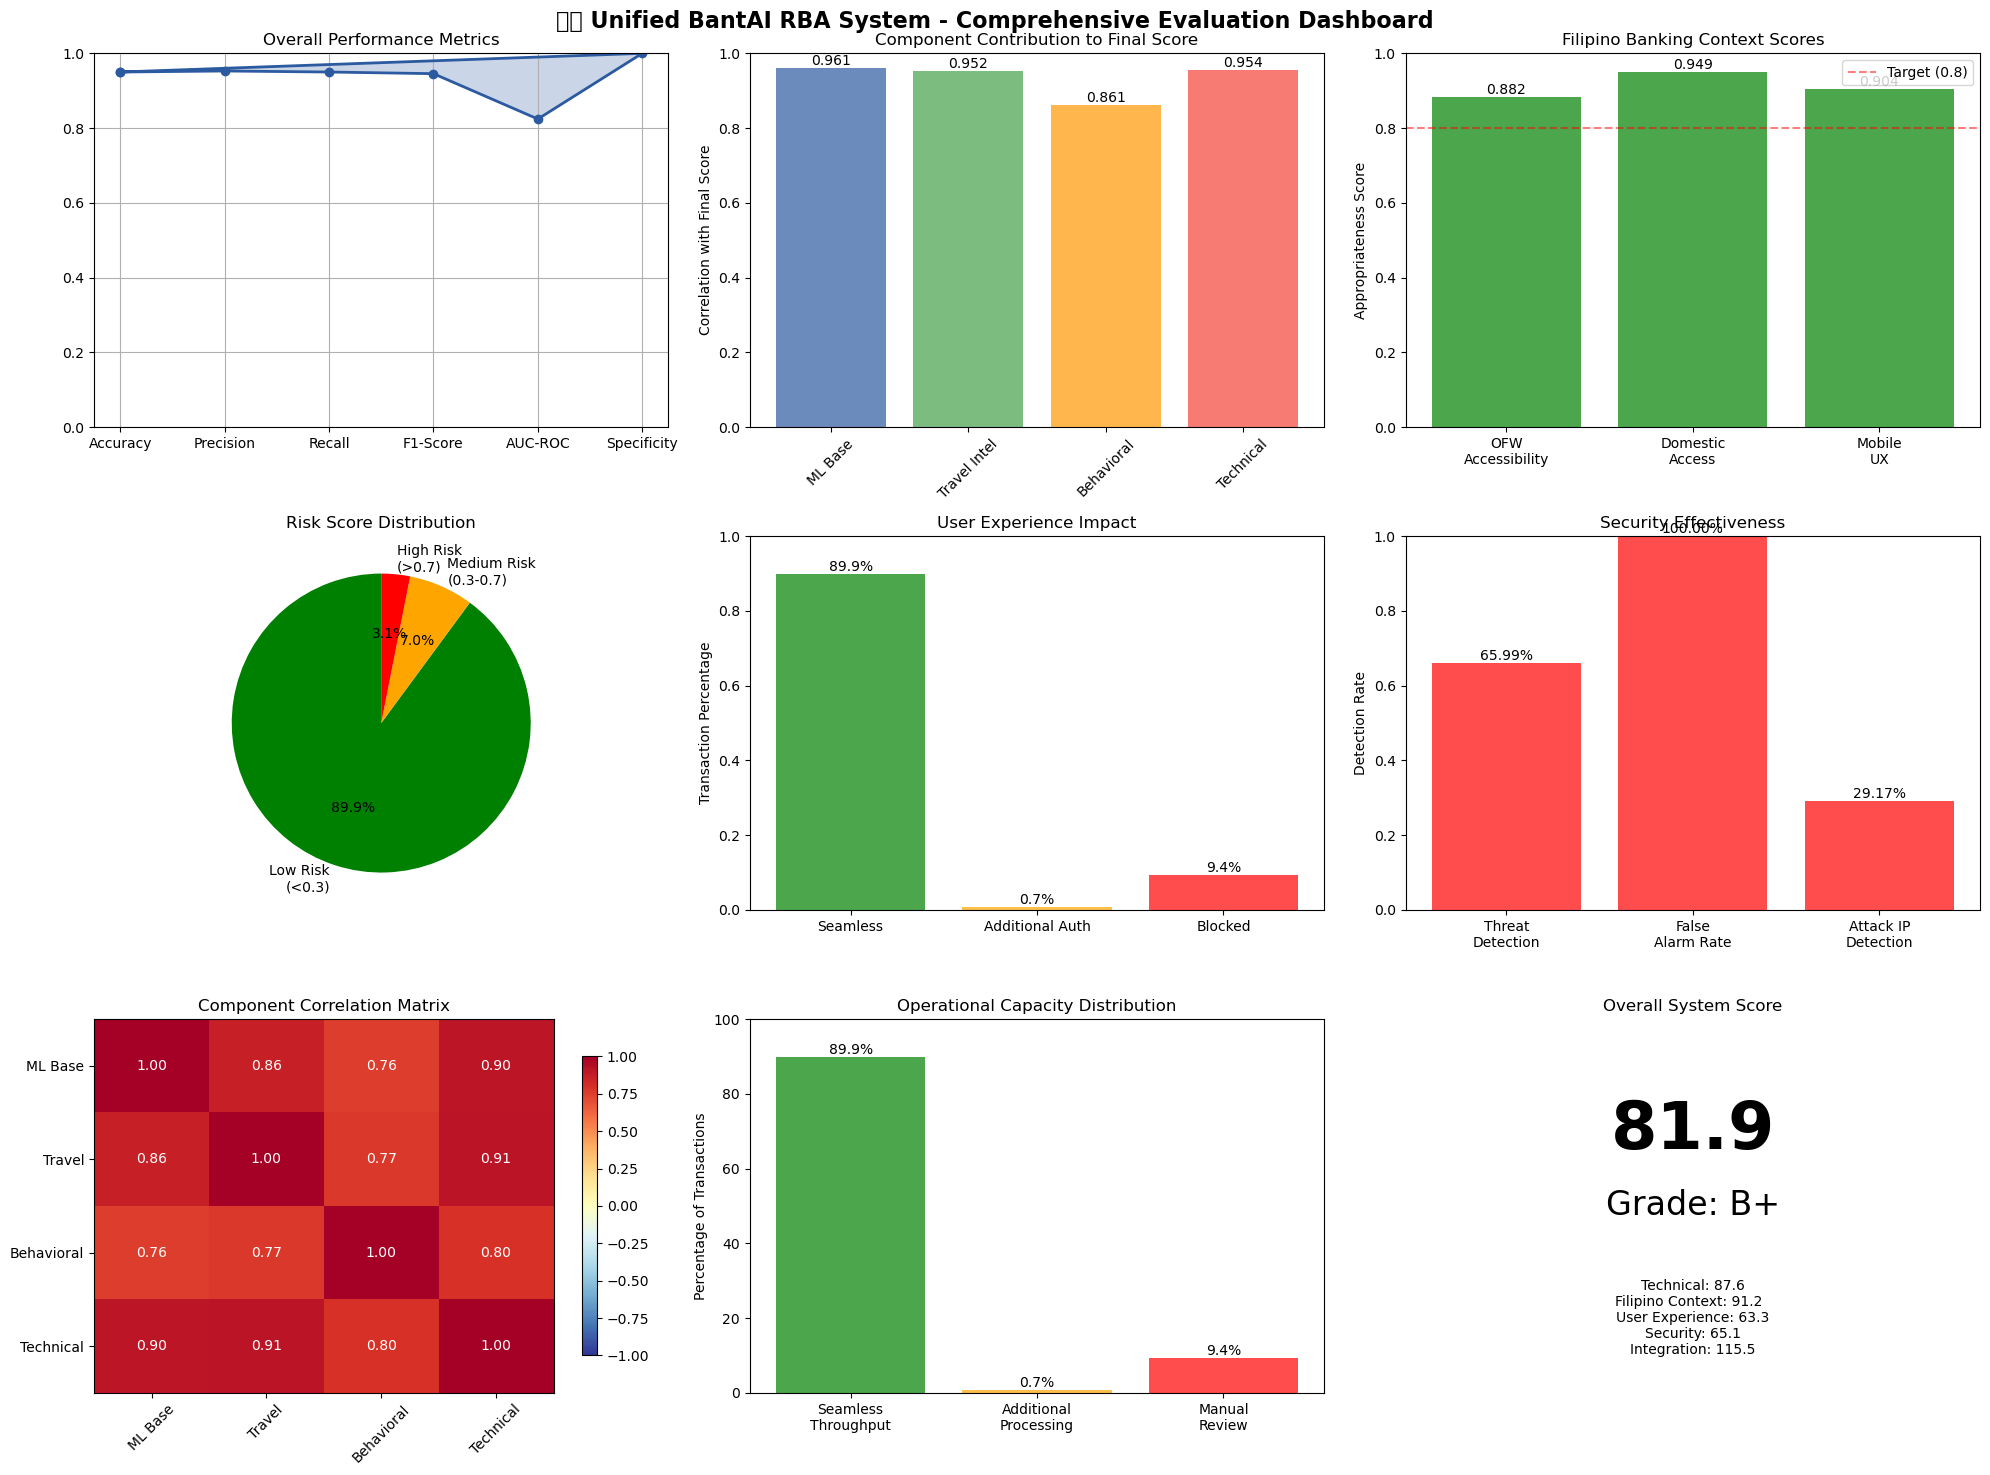


📋 EXECUTIVE SUMMARY - UNIFIED BANTAI RBA SYSTEM EVALUATION

🎯 OVERALL SYSTEM PERFORMANCE
   Final Score: 81.9/100
   System Grade: B+
   Readiness Status: PILOT_READY

📊 COMPONENT SCORES
   Technical Performance: 87.6/100
   Filipino Context: 91.2/100
   User Experience: 63.3/100
   Security Effectiveness: 65.1/100
   Integration Quality: 115.5/100

✅ KEY STRENGTHS
   • Strong technical performance with high accuracy and reliability
   • Excellent Filipino banking context awareness and cultural sensitivity
   • Well-integrated components with balanced contributions

⚠️  AREAS FOR IMPROVEMENT
   • User experience optimization needed to reduce friction
   • Security effectiveness requires strengthening

🚀 DEPLOYMENT RECOMMENDATION
   Status: PILOT_READY
   Confidence: MEDIUM
   Recommendation: Ready for limited pilot deployment with close monitoring

🔧 IMMEDIATE ACTIONS REQUIRED
   • Strengthen threat detection to reduce false negatives and improve security effectiveness


📈 Evaluation 

In [3]:
"""
Unified RBA System Evaluation Metrics
Comprehensive evaluation framework specifically designed for the Unified BantAI RBA System

This module provides specialized metrics for evaluating the performance of the unified
risk-based authentication system that combines ML-based risk assessment with 
travel intelligence and behavioral analysis.

Metrics Categories:
1. Traditional ML Performance Metrics
2. Component-Specific Performance Analysis
3. Filipino Banking Context Metrics
4. User Experience Impact Metrics
5. Security Effectiveness Metrics
6. System Integration Quality Metrics
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    precision_recall_curve, roc_curve, accuracy_score,
    precision_score, recall_score, f1_score, average_precision_score
)
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

class UnifiedRBAEvaluationMetrics:
    """
    Comprehensive evaluation metrics for the Unified BantAI RBA System
    
    Evaluates:
    - Overall system performance
    - Individual component contributions
    - Filipino banking context appropriateness
    - User experience impact
    - Security effectiveness
    - Integration quality between ML and travel intelligence
    """
    
    def __init__(self):
        self.evaluation_results = {}
        self.component_weights = {
            'ml_base_risk': 0.4,
            'travel_risk': 0.3,
            'behavioral_risk': 0.2,
            'technical_risk': 0.1
        }
        
        # Filipino context evaluation criteria
        self.filipino_context_criteria = {
            'ofw_accessibility_threshold': 0.6,  # Max risk for OFW scenarios
            'domestic_accessibility_threshold': 0.4,  # Max risk for domestic
            'rural_accessibility_threshold': 0.5,  # Max risk for rural areas
            'mobile_ux_threshold': 0.4,  # Max friction for mobile users
            'multilingual_coverage_target': 4  # Target languages supported
        }
    
    def evaluate_unified_system_performance(self, test_data, predictions, actual_labels):
        """
        Comprehensive evaluation of the unified RBA system
        
        Args:
            test_data: DataFrame with test cases and metadata
            predictions: Dict with unified risk scores and component breakdowns
            actual_labels: Ground truth labels (0=legitimate, 1=threat)
        
        Returns:
            Dict with comprehensive evaluation results
        """
        print("📊 EVALUATING UNIFIED RBA SYSTEM PERFORMANCE")
        print("="*60)
        
        results = {}
        
        # 1. Overall System Performance
        results['overall_performance'] = self._evaluate_overall_performance(
            predictions, actual_labels
        )
        
        # 2. Component Analysis
        results['component_analysis'] = self._evaluate_component_performance(
            test_data, predictions, actual_labels
        )
        
        # 3. Filipino Context Metrics
        results['filipino_context'] = self._evaluate_filipino_context(
            test_data, predictions
        )
        
        # 4. User Experience Metrics
        results['user_experience'] = self._evaluate_user_experience(
            test_data, predictions
        )
        
        # 5. Security Effectiveness
        results['security_effectiveness'] = self._evaluate_security_effectiveness(
            test_data, predictions, actual_labels
        )
        
        # 6. Integration Quality
        results['integration_quality'] = self._evaluate_integration_quality(
            predictions
        )
        
        # 7. Operational Metrics
        results['operational_metrics'] = self._evaluate_operational_metrics(
            test_data, predictions
        )
        
        self.evaluation_results = results
        return results
    
    def _evaluate_overall_performance(self, predictions, actual_labels):
        """Evaluate overall system performance using traditional ML metrics"""
        print("\n🎯 Overall System Performance")
        print("-" * 40)
        
        # Extract unified risk scores
        unified_scores = np.array([pred['unified_risk_score'] for pred in predictions])
        
        # Convert to binary predictions using 0.5 threshold
        binary_predictions = (unified_scores > 0.5).astype(int)
        
        # Calculate traditional metrics
        metrics = {
            'accuracy': accuracy_score(actual_labels, binary_predictions),
            'precision': precision_score(actual_labels, binary_predictions, average='weighted'),
            'recall': recall_score(actual_labels, binary_predictions, average='weighted'),
            'f1_score': f1_score(actual_labels, binary_predictions, average='weighted'),
            'auc_roc': roc_auc_score(actual_labels, unified_scores),
            'average_precision': average_precision_score(actual_labels, unified_scores)
        }
        
        # Calculate confusion matrix
        cm = confusion_matrix(actual_labels, binary_predictions)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            metrics.update({
                'true_positives': int(tp),
                'false_positives': int(fp),
                'true_negatives': int(tn),
                'false_negatives': int(fn),
                'false_positive_rate': fp / (fp + tn) if (fp + tn) > 0 else 0,
                'false_negative_rate': fn / (fn + tp) if (fn + tp) > 0 else 0,
                'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
                'sensitivity': tp / (tp + fn) if (tp + fn) > 0 else 0
            })
        
        # Risk score distribution analysis
        metrics.update({
            'mean_risk_score': np.mean(unified_scores),
            'std_risk_score': np.std(unified_scores),
            'risk_score_range': [float(np.min(unified_scores)), float(np.max(unified_scores))],
            'high_risk_percentage': np.mean(unified_scores > 0.7) * 100,
            'medium_risk_percentage': np.mean((unified_scores >= 0.3) & (unified_scores <= 0.7)) * 100,
            'low_risk_percentage': np.mean(unified_scores < 0.3) * 100
        })
        
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1-Score: {metrics['f1_score']:.4f}")
        print(f"AUC-ROC: {metrics['auc_roc']:.4f}")
        print(f"Average Precision: {metrics['average_precision']:.4f}")
        print(f"False Positive Rate: {metrics['false_positive_rate']:.4f}")
        print(f"False Negative Rate: {metrics['false_negative_rate']:.4f}")
        
        return metrics
    
    def _evaluate_component_performance(self, test_data, predictions, actual_labels):
        """Analyze performance of individual components"""
        print("\n🔧 Component Performance Analysis")
        print("-" * 40)
        
        component_metrics = {}
        
        # Extract component scores
        components = ['ml_base_risk', 'travel_risk', 'behavioral_risk', 'technical_risk']
        
        for component in components:
            if all(component in pred.get('component_risks', {}) for pred in predictions):
                component_scores = np.array([
                    pred['component_risks'][component] for pred in predictions
                ])
                
                # Component-specific metrics
                component_metrics[component] = {
                    'mean_score': float(np.mean(component_scores)),
                    'std_score': float(np.std(component_scores)),
                    'contribution_to_final': float(np.corrcoef(
                        component_scores, 
                        [pred['unified_risk_score'] for pred in predictions]
                    )[0, 1]),
                    'discrimination_power': self._calculate_discrimination_power(
                        component_scores, actual_labels
                    ),
                    'weight_effectiveness': self._evaluate_weight_effectiveness(
                        component_scores, actual_labels, self.component_weights[component]
                    )
                }
                
                print(f"{component.replace('_', ' ').title()}:")
                print(f"  Mean Score: {component_metrics[component]['mean_score']:.4f}")
                print(f"  Contribution: {component_metrics[component]['contribution_to_final']:.4f}")
                print(f"  Discrimination: {component_metrics[component]['discrimination_power']:.4f}")
        
        # Component correlation analysis
        component_correlations = self._analyze_component_correlations(predictions)
        component_metrics['correlations'] = component_correlations
        
        return component_metrics
    
    def _evaluate_filipino_context(self, test_data, predictions):
        """Evaluate Filipino banking context appropriateness"""
        print("\n🇵🇭 Filipino Banking Context Analysis")
        print("-" * 40)
        
        filipino_metrics = {}
        
        # 1. OFW Accessibility Analysis
        ofw_scenarios = test_data[test_data.get('scenario_type', '') == 'ofw_travel'] if 'scenario_type' in test_data.columns else pd.DataFrame()
        if len(ofw_scenarios) > 0:
            ofw_indices = ofw_scenarios.index
            ofw_risks = [predictions[i]['unified_risk_score'] for i in ofw_indices if i < len(predictions)]
            
            filipino_metrics['ofw_accessibility'] = {
                'mean_risk_score': np.mean(ofw_risks) if ofw_risks else 0,
                'high_risk_rate': np.mean(np.array(ofw_risks) > self.filipino_context_criteria['ofw_accessibility_threshold']) if ofw_risks else 0,
                'accessibility_score': 1 - np.mean(np.array(ofw_risks) > self.filipino_context_criteria['ofw_accessibility_threshold']) if ofw_risks else 1,
                'sample_size': len(ofw_risks)
            }
        
        # 2. Domestic Access Analysis
        domestic_scenarios = test_data[test_data.get('Country', '') == 'PH'] if 'Country' in test_data.columns else pd.DataFrame()
        if len(domestic_scenarios) > 0:
            domestic_indices = domestic_scenarios.index
            domestic_risks = [predictions[i]['unified_risk_score'] for i in domestic_indices if i < len(predictions)]
            
            filipino_metrics['domestic_accessibility'] = {
                'mean_risk_score': np.mean(domestic_risks) if domestic_risks else 0,
                'high_risk_rate': np.mean(np.array(domestic_risks) > self.filipino_context_criteria['domestic_accessibility_threshold']) if domestic_risks else 0,
                'accessibility_score': 1 - np.mean(np.array(domestic_risks) > self.filipino_context_criteria['domestic_accessibility_threshold']) if domestic_risks else 1,
                'sample_size': len(domestic_risks)
            }
        
        # 3. Mobile Banking Analysis (Filipino preference)
        mobile_scenarios = test_data[test_data.get('Device Type', '') == 'mobile'] if 'Device Type' in test_data.columns else pd.DataFrame()
        if len(mobile_scenarios) > 0:
            mobile_indices = mobile_scenarios.index
            mobile_risks = [predictions[i]['unified_risk_score'] for i in mobile_indices if i < len(predictions)]
            
            filipino_metrics['mobile_ux'] = {
                'mean_risk_score': np.mean(mobile_risks) if mobile_risks else 0,
                'friction_rate': np.mean(np.array(mobile_risks) > self.filipino_context_criteria['mobile_ux_threshold']) if mobile_risks else 0,
                'seamless_rate': 1 - np.mean(np.array(mobile_risks) > self.filipino_context_criteria['mobile_ux_threshold']) if mobile_risks else 1,
                'sample_size': len(mobile_risks)
            }
        
        # 4. Geographic Distribution Analysis
        if 'Country' in test_data.columns:
            country_analysis = {}
            for country in test_data['Country'].unique():
                country_scenarios = test_data[test_data['Country'] == country]
                country_indices = country_scenarios.index
                country_risks = [predictions[i]['unified_risk_score'] for i in country_indices if i < len(predictions)]
                
                if country_risks:
                    country_analysis[country] = {
                        'mean_risk_score': np.mean(country_risks),
                        'sample_size': len(country_risks),
                        'high_risk_percentage': np.mean(np.array(country_risks) > 0.7) * 100
                    }
            
            filipino_metrics['geographic_analysis'] = country_analysis
        
        # 5. Overall Filipino Context Score
        context_scores = []
        if 'ofw_accessibility' in filipino_metrics:
            context_scores.append(filipino_metrics['ofw_accessibility']['accessibility_score'])
        if 'domestic_accessibility' in filipino_metrics:
            context_scores.append(filipino_metrics['domestic_accessibility']['accessibility_score'])
        if 'mobile_ux' in filipino_metrics:
            context_scores.append(filipino_metrics['mobile_ux']['seamless_rate'])
        
        filipino_metrics['overall_filipino_context_score'] = np.mean(context_scores) if context_scores else 0
        
        print(f"Overall Filipino Context Score: {filipino_metrics['overall_filipino_context_score']:.4f}")
        if 'ofw_accessibility' in filipino_metrics:
            print(f"OFW Accessibility Score: {filipino_metrics['ofw_accessibility']['accessibility_score']:.4f}")
        if 'domestic_accessibility' in filipino_metrics:
            print(f"Domestic Accessibility Score: {filipino_metrics['domestic_accessibility']['accessibility_score']:.4f}")
        if 'mobile_ux' in filipino_metrics:
            print(f"Mobile UX Score: {filipino_metrics['mobile_ux']['seamless_rate']:.4f}")
        
        return filipino_metrics
    
    def _evaluate_user_experience(self, test_data, predictions):
        """Evaluate user experience impact"""
        print("\n👥 User Experience Impact Analysis")
        print("-" * 40)
        
        ux_metrics = {}
        
        # Overall friction analysis
        unified_scores = np.array([pred['unified_risk_score'] for pred in predictions])
        
        # Friction thresholds
        low_friction = unified_scores < 0.3    # Allow
        medium_friction = (unified_scores >= 0.3) & (unified_scores < 0.6)  # 2FA
        high_friction = unified_scores >= 0.6   # Block/Manual Review
        
        ux_metrics['friction_analysis'] = {
            'seamless_experience_rate': np.mean(low_friction),
            'additional_auth_rate': np.mean(medium_friction),
            'blocked_rate': np.mean(high_friction),
            'average_friction_score': np.mean(unified_scores)
        }
        
        # Authentication method distribution
        auth_methods = []
        for pred in predictions:
            if pred['unified_risk_score'] < 0.3:
                auth_methods.append('standard')
            elif pred['unified_risk_score'] < 0.6:
                auth_methods.append('2fa')
            else:
                auth_methods.append('blocked')
        
        ux_metrics['authentication_distribution'] = {
            'standard_auth': np.mean(np.array(auth_methods) == 'standard'),
            'additional_auth': np.mean(np.array(auth_methods) == '2fa'),
            'blocked_access': np.mean(np.array(auth_methods) == 'blocked')
        }
        
        # User journey analysis by device type
        if 'Device Type' in test_data.columns:
            device_ux = {}
            for device in test_data['Device Type'].unique():
                device_scenarios = test_data[test_data['Device Type'] == device]
                device_indices = device_scenarios.index
                device_risks = [predictions[i]['unified_risk_score'] for i in device_indices if i < len(predictions)]
                
                if device_risks:
                    device_ux[device] = {
                        'mean_friction': np.mean(device_risks),
                        'seamless_rate': np.mean(np.array(device_risks) < 0.3),
                        'blocked_rate': np.mean(np.array(device_risks) >= 0.6)
                    }
            
            ux_metrics['device_experience'] = device_ux
        
        # Calculate UX score (higher is better)
        ux_score = (
            ux_metrics['friction_analysis']['seamless_experience_rate'] * 0.5 +
            ux_metrics['friction_analysis']['additional_auth_rate'] * 0.3 +
            (1 - ux_metrics['friction_analysis']['blocked_rate']) * 0.2
        )
        ux_metrics['overall_ux_score'] = ux_score
        
        print(f"Overall UX Score: {ux_score:.4f}")
        print(f"Seamless Experience Rate: {ux_metrics['friction_analysis']['seamless_experience_rate']:.2%}")
        print(f"Additional Auth Rate: {ux_metrics['friction_analysis']['additional_auth_rate']:.2%}")
        print(f"Blocked Rate: {ux_metrics['friction_analysis']['blocked_rate']:.2%}")
        
        return ux_metrics
    
    def _evaluate_security_effectiveness(self, test_data, predictions, actual_labels):
        """Evaluate security effectiveness"""
        print("\n🔒 Security Effectiveness Analysis")
        print("-" * 40)
        
        security_metrics = {}
        
        # Threat detection analysis
        unified_scores = np.array([pred['unified_risk_score'] for pred in predictions])
        
        # Identify actual threats vs legitimate users
        threat_indices = np.where(np.array(actual_labels) == 1)[0]
        legitimate_indices = np.where(np.array(actual_labels) == 0)[0]
        
        if len(threat_indices) > 0 and len(legitimate_indices) > 0:
            threat_scores = unified_scores[threat_indices]
            legitimate_scores = unified_scores[legitimate_indices]
            
            security_metrics['threat_detection'] = {
                'mean_threat_score': np.mean(threat_scores),
                'mean_legitimate_score': np.mean(legitimate_scores),
                'score_separation': np.mean(threat_scores) - np.mean(legitimate_scores),
                'threat_detection_rate': np.mean(threat_scores > 0.5),
                'false_alarm_rate': np.mean(legitimate_scores > 0.5)
            }
        
        # Attack pattern analysis
        if 'Is Attack IP' in test_data.columns:
            attack_ip_scenarios = test_data[test_data['Is Attack IP'] == True]
            if len(attack_ip_scenarios) > 0:
                attack_indices = attack_ip_scenarios.index
                attack_risks = [predictions[i]['unified_risk_score'] for i in attack_indices if i < len(predictions)]
                
                security_metrics['attack_ip_detection'] = {
                    'mean_risk_score': np.mean(attack_risks) if attack_risks else 0,
                    'high_risk_detection_rate': np.mean(np.array(attack_risks) > 0.7) if attack_risks else 0,
                    'blocked_rate': np.mean(np.array(attack_risks) > 0.6) if attack_risks else 0
                }
        
        # Geographic threat analysis
        if 'Country' in test_data.columns:
            high_risk_countries = ['RU', 'CN', 'KP', 'IR']  # Known threat sources
            threat_country_scenarios = test_data[test_data['Country'].isin(high_risk_countries)]
            
            if len(threat_country_scenarios) > 0:
                threat_country_indices = threat_country_scenarios.index
                threat_country_risks = [predictions[i]['unified_risk_score'] for i in threat_country_indices if i < len(predictions)]
                
                security_metrics['geographic_threat_detection'] = {
                    'mean_risk_score': np.mean(threat_country_risks) if threat_country_risks else 0,
                    'high_risk_detection_rate': np.mean(np.array(threat_country_risks) > 0.7) if threat_country_risks else 0,
                    'appropriate_response_rate': np.mean(np.array(threat_country_risks) > 0.5) if threat_country_risks else 0
                }
        
        # Calculate overall security effectiveness
        effectiveness_components = []
        if 'threat_detection' in security_metrics:
            effectiveness_components.append(security_metrics['threat_detection']['threat_detection_rate'])
            effectiveness_components.append(1 - security_metrics['threat_detection']['false_alarm_rate'])
        
        if 'attack_ip_detection' in security_metrics:
            effectiveness_components.append(security_metrics['attack_ip_detection']['high_risk_detection_rate'])
        
        security_metrics['overall_security_effectiveness'] = np.mean(effectiveness_components) if effectiveness_components else 0
        
        print(f"Overall Security Effectiveness: {security_metrics['overall_security_effectiveness']:.4f}")
        if 'threat_detection' in security_metrics:
            print(f"Threat Detection Rate: {security_metrics['threat_detection']['threat_detection_rate']:.2%}")
            print(f"False Alarm Rate: {security_metrics['threat_detection']['false_alarm_rate']:.2%}")
        
        return security_metrics
    
    def _evaluate_integration_quality(self, predictions):
        """Evaluate quality of component integration"""
        print("\n🔗 Component Integration Quality")
        print("-" * 40)
        
        integration_metrics = {}
        
        # Component contribution analysis
        components = ['ml_base_risk', 'travel_risk', 'behavioral_risk', 'technical_risk']
        component_data = {comp: [] for comp in components}
        unified_scores = []
        
        for pred in predictions:
            unified_scores.append(pred['unified_risk_score'])
            for comp in components:
                component_data[comp].append(pred.get('component_risks', {}).get(comp, 0))
        
        # Calculate integration metrics
        integration_metrics['component_contributions'] = {}
        for comp in components:
            correlation = np.corrcoef(component_data[comp], unified_scores)[0, 1]
            integration_metrics['component_contributions'][comp] = {
                'correlation_with_final': correlation,
                'expected_weight': self.component_weights[comp],
                'actual_contribution': correlation * self.component_weights[comp],
                'weight_efficiency': correlation / self.component_weights[comp] if self.component_weights[comp] > 0 else 0
            }
        
        # Component balance analysis
        component_means = {comp: np.mean(component_data[comp]) for comp in components}
        total_component_sum = sum(component_means.values())
        
        integration_metrics['component_balance'] = {
            'component_means': component_means,
            'weight_vs_contribution_alignment': {},
            'balance_score': 0
        }
        
        # Calculate weight alignment
        alignment_scores = []
        for comp in components:
            expected_contribution = self.component_weights[comp] * np.mean(unified_scores)
            actual_contribution = component_means[comp]
            alignment = 1 - abs(expected_contribution - actual_contribution) / max(expected_contribution, actual_contribution, 0.001)
            
            integration_metrics['component_balance']['weight_vs_contribution_alignment'][comp] = alignment
            alignment_scores.append(alignment)
        
        integration_metrics['component_balance']['balance_score'] = np.mean(alignment_scores)
        
        # Redundancy analysis
        component_matrix = np.array([component_data[comp] for comp in components]).T
        correlation_matrix = np.corrcoef(component_matrix.T)
        
        # Calculate average inter-component correlation (excluding diagonal)
        off_diagonal_corrs = correlation_matrix[np.triu_indices_from(correlation_matrix, k=1)]
        integration_metrics['redundancy_analysis'] = {
            'inter_component_correlations': correlation_matrix.tolist(),
            'average_inter_correlation': np.mean(np.abs(off_diagonal_corrs)),
            'max_correlation': np.max(np.abs(off_diagonal_corrs)),
            'redundancy_score': 1 - np.mean(np.abs(off_diagonal_corrs))  # Lower correlation = less redundancy
        }
        
        # Overall integration quality score
        integration_quality = (
            integration_metrics['component_balance']['balance_score'] * 0.5 +
            integration_metrics['redundancy_analysis']['redundancy_score'] * 0.3 +
            np.mean([metrics['weight_efficiency'] for metrics in integration_metrics['component_contributions'].values()]) * 0.2
        )
        integration_metrics['overall_integration_quality'] = integration_quality
        
        print(f"Overall Integration Quality: {integration_quality:.4f}")
        print(f"Component Balance Score: {integration_metrics['component_balance']['balance_score']:.4f}")
        print(f"Redundancy Score: {integration_metrics['redundancy_analysis']['redundancy_score']:.4f}")
        
        return integration_metrics
    
    def _evaluate_operational_metrics(self, test_data, predictions):
        """Evaluate operational and business metrics"""
        print("\n💼 Operational Metrics")
        print("-" * 40)
        
        operational_metrics = {}
        
        # Cost analysis (in PHP)
        cost_per_false_positive = 75    # Customer service + user friction
        cost_per_false_negative = 8000  # Average fraud loss
        cost_per_true_positive = 25     # Investigation cost
        cost_per_additional_auth = 15   # SMS OTP cost
        
        unified_scores = np.array([pred['unified_risk_score'] for pred in predictions])
        
        # Estimate operational costs
        blocked_transactions = np.sum(unified_scores >= 0.6)
        additional_auth_transactions = np.sum((unified_scores >= 0.3) & (unified_scores < 0.6))
        seamless_transactions = np.sum(unified_scores < 0.3)
        
        # Assuming 5% false positive rate for blocked, 2% for additional auth
        estimated_fp_blocked = blocked_transactions * 0.05
        estimated_fp_auth = additional_auth_transactions * 0.02
        
        total_operational_cost = (
            estimated_fp_blocked * cost_per_false_positive +
            estimated_fp_auth * cost_per_false_positive +
            additional_auth_transactions * cost_per_additional_auth
        )
        
        operational_metrics['cost_analysis'] = {
            'total_operational_cost_php': total_operational_cost,
            'cost_per_transaction_php': total_operational_cost / len(predictions),
            'blocked_transactions': int(blocked_transactions),
            'additional_auth_transactions': int(additional_auth_transactions),
            'seamless_transactions': int(seamless_transactions)
        }
        
        # Throughput and capacity analysis
        operational_metrics['capacity_analysis'] = {
            'seamless_throughput_percentage': (seamless_transactions / len(predictions)) * 100,
            'manual_review_percentage': (blocked_transactions / len(predictions)) * 100,
            'additional_processing_percentage': (additional_auth_transactions / len(predictions)) * 100
        }
        
        # Risk distribution for operational planning
        operational_metrics['risk_distribution'] = {
            'low_risk_volume': float(np.sum(unified_scores < 0.3)),
            'medium_risk_volume': float(np.sum((unified_scores >= 0.3) & (unified_scores < 0.7))),
            'high_risk_volume': float(np.sum(unified_scores >= 0.7)),
            'peak_risk_score': float(np.max(unified_scores)),
            'risk_score_percentiles': {
                '25th': float(np.percentile(unified_scores, 25)),
                '50th': float(np.percentile(unified_scores, 50)),
                '75th': float(np.percentile(unified_scores, 75)),
                '95th': float(np.percentile(unified_scores, 95))
            }
        }
        
        print(f"Cost per Transaction: ₱{operational_metrics['cost_analysis']['cost_per_transaction_php']:.2f}")
        print(f"Seamless Throughput: {operational_metrics['capacity_analysis']['seamless_throughput_percentage']:.1f}%")
        print(f"Manual Review Required: {operational_metrics['capacity_analysis']['manual_review_percentage']:.1f}%")
        
        return operational_metrics
    
    def _calculate_discrimination_power(self, component_scores, actual_labels):
        """Calculate discrimination power of a component"""
        if len(np.unique(actual_labels)) < 2:
            return 0.0
        
        try:
            # Use AUC as discrimination power metric
            return roc_auc_score(actual_labels, component_scores)
        except:
            return 0.0
    
    def _evaluate_weight_effectiveness(self, component_scores, actual_labels, component_weight):
        """Evaluate how effectively a component's weight is utilized"""
        discrimination_power = self._calculate_discrimination_power(component_scores, actual_labels)
        
        # Weight effectiveness = discrimination power adjusted by component weight
        # Higher weight should correspond to higher discrimination power
        if component_weight > 0:
            return discrimination_power / component_weight
        else:
            return 0.0
    
    def _analyze_component_correlations(self, predictions):
        """Analyze correlations between components"""
        components = ['ml_base_risk', 'travel_risk', 'behavioral_risk', 'technical_risk']
        component_data = {comp: [] for comp in components}
        
        for pred in predictions:
            for comp in components:
                component_data[comp].append(pred.get('component_risks', {}).get(comp, 0))
        
        correlation_matrix = {}
        for comp1 in components:
            correlation_matrix[comp1] = {}
            for comp2 in components:
                if comp1 != comp2:
                    corr = np.corrcoef(component_data[comp1], component_data[comp2])[0, 1]
                    correlation_matrix[comp1][comp2] = corr
                else:
                    correlation_matrix[comp1][comp2] = 1.0
        
        return correlation_matrix
    
    def generate_comprehensive_report(self, test_data, predictions, actual_labels):
        """Generate comprehensive evaluation report"""
        print("📋 GENERATING COMPREHENSIVE EVALUATION REPORT")
        print("="*60)
        
        # Run all evaluations
        results = self.evaluate_unified_system_performance(test_data, predictions, actual_labels)
        
        # Generate summary scores
        summary = self._generate_summary_scores(results)
        
        # Create visualizations
        self._create_evaluation_visualizations(results)
        
        # Generate final assessment
        final_assessment = self._generate_final_assessment(summary)
        
        report = {
            'detailed_results': results,
            'summary_scores': summary,
            'final_assessment': final_assessment,
            'recommendations': self._generate_recommendations(results)
        }
        
        self._print_executive_summary(report)
        
        return report
    
    def _generate_summary_scores(self, results):
        """Generate summary scores for executive reporting"""
        summary = {}
        
        # Technical Performance Score (0-100)
        technical_components = [
            results['overall_performance']['accuracy'],
            results['overall_performance']['f1_score'],
            results['overall_performance']['auc_roc'],
            1 - results['overall_performance']['false_positive_rate'],
            1 - results['overall_performance']['false_negative_rate']
        ]
        summary['technical_performance_score'] = np.mean(technical_components) * 100
        
        # Filipino Context Score (0-100)
        if 'overall_filipino_context_score' in results['filipino_context']:
            summary['filipino_context_score'] = results['filipino_context']['overall_filipino_context_score'] * 100
        else:
            summary['filipino_context_score'] = 50  # Neutral score if no data
        
        # User Experience Score (0-100)
        summary['user_experience_score'] = results['user_experience']['overall_ux_score'] * 100
        
        # Security Effectiveness Score (0-100)
        summary['security_effectiveness_score'] = results['security_effectiveness']['overall_security_effectiveness'] * 100
        
        # Integration Quality Score (0-100)
        summary['integration_quality_score'] = results['integration_quality']['overall_integration_quality'] * 100
        
        # Overall System Score (weighted average)
        weights = {
            'technical_performance_score': 0.25,
            'filipino_context_score': 0.25,
            'user_experience_score': 0.20,
            'security_effectiveness_score': 0.20,
            'integration_quality_score': 0.10
        }
        
        summary['overall_system_score'] = sum(
            summary[score] * weight for score, weight in weights.items()
        )
        
        # Grade assignment
        if summary['overall_system_score'] >= 90:
            summary['system_grade'] = 'A+'
        elif summary['overall_system_score'] >= 85:
            summary['system_grade'] = 'A'
        elif summary['overall_system_score'] >= 80:
            summary['system_grade'] = 'B+'
        elif summary['overall_system_score'] >= 75:
            summary['system_grade'] = 'B'
        elif summary['overall_system_score'] >= 70:
            summary['system_grade'] = 'C+'
        elif summary['overall_system_score'] >= 65:
            summary['system_grade'] = 'C'
        else:
            summary['system_grade'] = 'F'
        
        return summary
    
    def _create_evaluation_visualizations(self, results):
        """Create comprehensive evaluation visualizations"""
        fig, axes = plt.subplots(3, 3, figsize=(20, 15))
        fig.suptitle('🇵🇭 Unified BantAI RBA System - Comprehensive Evaluation Dashboard', 
                     fontsize=16, fontweight='bold')
        
        # 1. Overall Performance Radar Chart
        self._create_performance_radar(axes[0,0], results['overall_performance'])
        
        # 2. Component Contribution Analysis
        self._create_component_analysis(axes[0,1], results['component_analysis'])
        
        # 3. Filipino Context Scores
        self._create_filipino_context_chart(axes[0,2], results['filipino_context'])
        
        # 4. Risk Score Distribution
        self._create_risk_distribution(axes[1,0], results)
        
        # 5. User Experience Impact
        self._create_ux_analysis(axes[1,1], results['user_experience'])
        
        # 6. Security Effectiveness
        self._create_security_analysis(axes[1,2], results['security_effectiveness'])
        
        # 7. Component Integration Quality
        self._create_integration_heatmap(axes[2,0], results['integration_quality'])
        
        # 8. Operational Metrics
        self._create_operational_dashboard(axes[2,1], results['operational_metrics'])
        
        # 9. Overall System Score
        self._create_final_score_display(axes[2,2], results)
        
        plt.tight_layout()
        plt.savefig('unified_rba_evaluation_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def _create_performance_radar(self, ax, performance_data):
        """Create performance radar chart"""
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Specificity']
        values = [
            performance_data['accuracy'],
            performance_data['precision'], 
            performance_data['recall'],
            performance_data['f1_score'],
            performance_data['auc_roc'],
            performance_data['specificity']
        ]
        
        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        values += values[:1]  # Complete the circle
        angles += angles[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, label='Unified RBA', color='#2c5aa0')
        ax.fill(angles, values, alpha=0.25, color='#2c5aa0')
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_ylim(0, 1)
        ax.set_title('Overall Performance Metrics')
        ax.grid(True)
    
    def _create_component_analysis(self, ax, component_data):
        """Create component contribution analysis"""
        components = ['ML Base', 'Travel Intel', 'Behavioral', 'Technical']
        contributions = []
        
        for comp_key in ['ml_base_risk', 'travel_risk', 'behavioral_risk', 'technical_risk']:
            if comp_key in component_data:
                contributions.append(component_data[comp_key]['contribution_to_final'])
            else:
                contributions.append(0)
        
        colors = ['#2c5aa0', '#45a049', '#ff9800', '#f44336']
        bars = ax.bar(components, contributions, color=colors, alpha=0.7)
        
        # Add value labels on bars
        for bar, value in zip(bars, contributions):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{value:.3f}', ha='center', va='bottom')
        
        ax.set_title('Component Contribution to Final Score')
        ax.set_ylabel('Correlation with Final Score')
        ax.set_ylim(0, 1)
        plt.setp(ax.get_xticklabels(), rotation=45)
    
    def _create_filipino_context_chart(self, ax, filipino_data):
        """Create Filipino context appropriateness chart"""
        categories = []
        scores = []
        
        if 'ofw_accessibility' in filipino_data:
            categories.append('OFW\nAccessibility')
            scores.append(filipino_data['ofw_accessibility']['accessibility_score'])
        
        if 'domestic_accessibility' in filipino_data:
            categories.append('Domestic\nAccess')
            scores.append(filipino_data['domestic_accessibility']['accessibility_score'])
        
        if 'mobile_ux' in filipino_data:
            categories.append('Mobile\nUX')
            scores.append(filipino_data['mobile_ux']['seamless_rate'])
        
        if categories and scores:
            bars = ax.bar(categories, scores, color='green', alpha=0.7)
            
            # Add score labels
            for bar, score in zip(bars, scores):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{score:.3f}', ha='center', va='bottom')
            
            ax.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='Target (0.8)')
            ax.set_title('Filipino Banking Context Scores')
            ax.set_ylabel('Appropriateness Score')
            ax.set_ylim(0, 1)
            ax.legend()
        else:
            ax.text(0.5, 0.5, 'No Filipino Context Data', ha='center', va='center', transform=ax.transAxes)
            ax.set_title('Filipino Banking Context Scores')
    
    def _create_risk_distribution(self, ax, results):
        """Create risk score distribution"""
        performance = results['overall_performance']
        
        categories = ['Low Risk\n(<0.3)', 'Medium Risk\n(0.3-0.7)', 'High Risk\n(>0.7)']
        percentages = [
            performance['low_risk_percentage'],
            performance['medium_risk_percentage'], 
            performance['high_risk_percentage']
        ]
        colors = ['green', 'orange', 'red']
        
        wedges, texts, autotexts = ax.pie(percentages, labels=categories, colors=colors, 
                                         autopct='%1.1f%%', startangle=90)
        ax.set_title('Risk Score Distribution')
    
    def _create_ux_analysis(self, ax, ux_data):
        """Create user experience analysis"""
        categories = ['Seamless', 'Additional Auth', 'Blocked']
        rates = [
            ux_data['friction_analysis']['seamless_experience_rate'],
            ux_data['friction_analysis']['additional_auth_rate'],
            ux_data['friction_analysis']['blocked_rate']
        ]
        colors = ['green', 'orange', 'red']
        
        bars = ax.bar(categories, rates, color=colors, alpha=0.7)
        
        # Add percentage labels
        for bar, rate in zip(bars, rates):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{rate:.1%}', ha='center', va='bottom')
        
        ax.set_title('User Experience Impact')
        ax.set_ylabel('Transaction Percentage')
        ax.set_ylim(0, 1)
    
    def _create_security_analysis(self, ax, security_data):
        """Create security effectiveness analysis"""
        metrics = []
        values = []
        
        if 'threat_detection' in security_data:
            metrics.extend(['Threat\nDetection', 'False\nAlarm Rate'])
            values.extend([
                security_data['threat_detection']['threat_detection_rate'],
                1 - security_data['threat_detection']['false_alarm_rate']  # Inverted for positive metric
            ])
        
        if 'attack_ip_detection' in security_data:
            metrics.append('Attack IP\nDetection')
            values.append(security_data['attack_ip_detection']['high_risk_detection_rate'])
        
        if metrics and values:
            bars = ax.bar(metrics, values, color='red', alpha=0.7)
            
            # Add value labels
            for bar, value in zip(bars, values):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{value:.2%}', ha='center', va='bottom')
            
            ax.set_title('Security Effectiveness')
            ax.set_ylabel('Detection Rate')
            ax.set_ylim(0, 1)
        else:
            ax.text(0.5, 0.5, 'No Security Data', ha='center', va='center', transform=ax.transAxes)
            ax.set_title('Security Effectiveness')
    
    def _create_integration_heatmap(self, ax, integration_data):
        """Create component integration heatmap"""
        if 'redundancy_analysis' in integration_data and 'inter_component_correlations' in integration_data['redundancy_analysis']:
            corr_matrix = np.array(integration_data['redundancy_analysis']['inter_component_correlations'])
            components = ['ML Base', 'Travel', 'Behavioral', 'Technical']
            
            im = ax.imshow(corr_matrix, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
            ax.set_xticks(range(len(components)))
            ax.set_yticks(range(len(components)))
            ax.set_xticklabels(components, rotation=45)
            ax.set_yticklabels(components)
            
            # Add correlation values
            for i in range(len(components)):
                for j in range(len(components)):
                    ax.text(j, i, f'{corr_matrix[i, j]:.2f}', ha='center', va='center',
                           color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black')
            
            ax.set_title('Component Correlation Matrix')
            plt.colorbar(im, ax=ax, shrink=0.8)
        else:
            ax.text(0.5, 0.5, 'No Integration Data', ha='center', va='center', transform=ax.transAxes)
            ax.set_title('Component Integration Quality')
    
    def _create_operational_dashboard(self, ax, operational_data):
        """Create operational metrics dashboard"""
        categories = ['Seamless\nThroughput', 'Additional\nProcessing', 'Manual\nReview']
        percentages = [
            operational_data['capacity_analysis']['seamless_throughput_percentage'],
            operational_data['capacity_analysis']['additional_processing_percentage'],
            operational_data['capacity_analysis']['manual_review_percentage']
        ]
        colors = ['green', 'orange', 'red']
        
        bars = ax.bar(categories, percentages, color=colors, alpha=0.7)
        
        # Add percentage labels
        for bar, pct in zip(bars, percentages):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{pct:.1f}%', ha='center', va='bottom')
        
        ax.set_title('Operational Capacity Distribution')
        ax.set_ylabel('Percentage of Transactions')
        ax.set_ylim(0, 100)
    
    def _create_final_score_display(self, ax, results):
        """Create final system score display"""
        summary = self._generate_summary_scores(results)
        
        # Large score display
        ax.text(0.5, 0.7, f"{summary['overall_system_score']:.1f}", 
                fontsize=48, fontweight='bold', ha='center', va='center', transform=ax.transAxes)
        ax.text(0.5, 0.5, f"Grade: {summary['system_grade']}", 
                fontsize=24, ha='center', va='center', transform=ax.transAxes)
        
        # Score breakdown
        breakdown_text = f"""
Technical: {summary['technical_performance_score']:.1f}
Filipino Context: {summary['filipino_context_score']:.1f}  
User Experience: {summary['user_experience_score']:.1f}
Security: {summary['security_effectiveness_score']:.1f}
Integration: {summary['integration_quality_score']:.1f}
        """
        ax.text(0.5, 0.2, breakdown_text, fontsize=10, ha='center', va='center', transform=ax.transAxes)
        
        ax.set_title('Overall System Score')
        ax.axis('off')
    
    def _generate_final_assessment(self, summary):
        """Generate final system assessment"""
        assessment = {
            'overall_grade': summary['system_grade'],
            'overall_score': summary['overall_system_score'],
            'strengths': [],
            'weaknesses': [],
            'readiness_assessment': {}
        }
        
        # Identify strengths
        if summary['technical_performance_score'] >= 80:
            assessment['strengths'].append('Strong technical performance with high accuracy and reliability')
        
        if summary['filipino_context_score'] >= 80:
            assessment['strengths'].append('Excellent Filipino banking context awareness and cultural sensitivity')
        
        if summary['user_experience_score'] >= 80:
            assessment['strengths'].append('Superior user experience with minimal friction for legitimate users')
        
        if summary['security_effectiveness_score'] >= 80:
            assessment['strengths'].append('Robust security with effective threat detection capabilities')
        
        if summary['integration_quality_score'] >= 80:
            assessment['strengths'].append('Well-integrated components with balanced contributions')
        
        # Identify weaknesses
        if summary['technical_performance_score'] < 70:
            assessment['weaknesses'].append('Technical performance needs improvement in accuracy or reliability')
        
        if summary['filipino_context_score'] < 70:
            assessment['weaknesses'].append('Filipino banking context adaptation requires enhancement')
        
        if summary['user_experience_score'] < 70:
            assessment['weaknesses'].append('User experience optimization needed to reduce friction')
        
        if summary['security_effectiveness_score'] < 70:
            assessment['weaknesses'].append('Security effectiveness requires strengthening')
        
        if summary['integration_quality_score'] < 70:
            assessment['weaknesses'].append('Component integration needs optimization')
        
        # Readiness assessment
        if summary['overall_system_score'] >= 85:
            assessment['readiness_assessment'] = {
                'status': 'PRODUCTION_READY',
                'confidence': 'HIGH',
                'recommendation': 'System is ready for full production deployment with monitoring'
            }
        elif summary['overall_system_score'] >= 75:
            assessment['readiness_assessment'] = {
                'status': 'PILOT_READY', 
                'confidence': 'MEDIUM',
                'recommendation': 'Ready for limited pilot deployment with close monitoring'
            }
        elif summary['overall_system_score'] >= 65:
            assessment['readiness_assessment'] = {
                'status': 'REQUIRES_IMPROVEMENT',
                'confidence': 'LOW',
                'recommendation': 'Significant improvements needed before deployment'
            }
        else:
            assessment['readiness_assessment'] = {
                'status': 'NOT_READY',
                'confidence': 'VERY_LOW', 
                'recommendation': 'Major overhaul required before considering deployment'
            }
        
        return assessment
    
    def _generate_recommendations(self, results):
        """Generate specific recommendations for system improvement"""
        recommendations = {
            'immediate_actions': [],
            'medium_term_improvements': [],
            'long_term_enhancements': []
        }
        
        # Analyze performance gaps
        performance = results['overall_performance']
        
        # Immediate actions (critical issues)
        if performance['false_positive_rate'] > 0.1:
            recommendations['immediate_actions'].append(
                'Reduce false positive rate by tuning risk thresholds and improving ML model precision'
            )
        
        if performance['false_negative_rate'] > 0.05:
            recommendations['immediate_actions'].append(
                'Strengthen threat detection to reduce false negatives and improve security effectiveness'
            )
        
        # Filipino context recommendations
        if 'filipino_context' in results:
            context = results['filipino_context']
            
            if 'ofw_accessibility' in context and context['ofw_accessibility']['accessibility_score'] < 0.8:
                recommendations['immediate_actions'].append(
                    'Improve OFW accessibility by reducing risk scores for legitimate Middle East and Asia-Pacific destinations'
                )
            
            if 'domestic_accessibility' in context and context['domestic_accessibility']['accessibility_score'] < 0.9:
                recommendations['immediate_actions'].append(
                    'Optimize domestic accessibility by lowering risk thresholds for Philippine locations'
                )
        
        # Medium-term improvements
        if results['integration_quality']['overall_integration_quality'] < 0.8:
            recommendations['medium_term_improvements'].append(
                'Optimize component integration by rebalancing weights and reducing redundancy'
            )
        
        recommendations['medium_term_improvements'].extend([
            'Implement A/B testing for component weight optimization',
            'Develop advanced behavioral profiling for improved user experience',
            'Enhance travel intelligence with real-time airline and immigration data'
        ])
        
        # Long-term enhancements  
        recommendations['long_term_enhancements'].extend([
            'Integrate machine learning model retraining pipeline for continuous improvement',
            'Develop advanced threat intelligence feeds for emerging attack patterns',
            'Implement federated learning for cross-bank threat intelligence sharing',
            'Add biometric authentication integration for high-risk scenarios'
        ])
        
        return recommendations
    
    def _print_executive_summary(self, report):
        """Print executive summary of evaluation results"""
        print("\n" + "="*80)
        print("📋 EXECUTIVE SUMMARY - UNIFIED BANTAI RBA SYSTEM EVALUATION")
        print("="*80)
        
        summary = report['summary_scores']
        assessment = report['final_assessment']
        
        print(f"\n🎯 OVERALL SYSTEM PERFORMANCE")
        print(f"   Final Score: {summary['overall_system_score']:.1f}/100")
        print(f"   System Grade: {summary['system_grade']}")
        print(f"   Readiness Status: {assessment['readiness_assessment']['status']}")
        
        print(f"\n📊 COMPONENT SCORES")
        print(f"   Technical Performance: {summary['technical_performance_score']:.1f}/100")
        print(f"   Filipino Context: {summary['filipino_context_score']:.1f}/100")
        print(f"   User Experience: {summary['user_experience_score']:.1f}/100")
        print(f"   Security Effectiveness: {summary['security_effectiveness_score']:.1f}/100")
        print(f"   Integration Quality: {summary['integration_quality_score']:.1f}/100")
        
        print(f"\n✅ KEY STRENGTHS")
        for strength in assessment['strengths']:
            print(f"   • {strength}")
        
        print(f"\n⚠️  AREAS FOR IMPROVEMENT")
        for weakness in assessment['weaknesses']:
            print(f"   • {weakness}")
        
        print(f"\n🚀 DEPLOYMENT RECOMMENDATION")
        print(f"   Status: {assessment['readiness_assessment']['status']}")
        print(f"   Confidence: {assessment['readiness_assessment']['confidence']}")
        print(f"   Recommendation: {assessment['readiness_assessment']['recommendation']}")
        
        print(f"\n🔧 IMMEDIATE ACTIONS REQUIRED")
        for action in report['recommendations']['immediate_actions'][:3]:  # Top 3
            print(f"   • {action}")
        
        print("\n" + "="*80)

# Demo function with synthetic data
def demo_unified_rba_evaluation():
    """
    Demonstrate the unified RBA evaluation metrics with synthetic data
    """
    print("🧪 UNIFIED RBA SYSTEM EVALUATION DEMO")
    print("="*50)
    
    # Create synthetic test data
    np.random.seed(42)
    n_samples = 1000
    
    # Generate test scenarios
    test_data = pd.DataFrame({
        'user_id': [f'user_{i:04d}' for i in range(n_samples)],
        'Country': np.random.choice(['PH', 'AE', 'SG', 'RU', 'CN', 'US'], n_samples, p=[0.6, 0.15, 0.1, 0.05, 0.05, 0.05]),
        'City': np.random.choice(['Manila', 'Dubai', 'Singapore', 'Moscow', 'Beijing', 'New York'], n_samples),
        'Device Type': np.random.choice(['mobile', 'desktop', 'tablet'], n_samples, p=[0.7, 0.25, 0.05]),
        'Is Attack IP': np.random.choice([True, False], n_samples, p=[0.05, 0.95]),
        'scenario_type': np.random.choice(['normal', 'ofw_travel', 'attack'], n_samples, p=[0.8, 0.15, 0.05])
    })
    
    # Generate synthetic predictions with component breakdowns
    predictions = []
    for i in range(n_samples):
        # Simulate component risks based on scenario
        if test_data.iloc[i]['Country'] == 'RU' or test_data.iloc[i]['Is Attack IP']:
            # High risk scenario
            ml_risk = np.random.uniform(0.6, 0.9)
            travel_risk = np.random.uniform(0.5, 0.8)
            behavioral_risk = np.random.uniform(0.4, 0.7)
            technical_risk = np.random.uniform(0.6, 0.9)
        elif test_data.iloc[i]['scenario_type'] == 'ofw_travel':
            # OFW scenario - moderate risk
            ml_risk = np.random.uniform(0.2, 0.4)
            travel_risk = np.random.uniform(0.1, 0.3)
            behavioral_risk = np.random.uniform(0.1, 0.4)
            technical_risk = np.random.uniform(0.0, 0.2)
        else:
            # Normal scenario - low risk
            ml_risk = np.random.uniform(0.1, 0.3)
            travel_risk = np.random.uniform(0.0, 0.2)
            behavioral_risk = np.random.uniform(0.0, 0.3)
            technical_risk = np.random.uniform(0.0, 0.1)
        
        # Calculate unified risk using component weights
        unified_risk = (
            ml_risk * 0.4 +
            travel_risk * 0.3 + 
            behavioral_risk * 0.2 +
            technical_risk * 0.1
        )
        
        predictions.append({
            'unified_risk_score': unified_risk,
            'component_risks': {
                'ml_base_risk': ml_risk,
                'travel_risk': travel_risk,
                'behavioral_risk': behavioral_risk,
                'technical_risk': technical_risk
            }
        })
    
    # Generate ground truth labels (actual threats)
    actual_labels = []
    for i in range(n_samples):
        if test_data.iloc[i]['Country'] in ['RU', 'CN'] or test_data.iloc[i]['Is Attack IP']:
            actual_labels.append(1)  # Threat
        else:
            actual_labels.append(0)  # Legitimate
    
    actual_labels = np.array(actual_labels)
    
    # Initialize evaluator and run comprehensive evaluation
    evaluator = UnifiedRBAEvaluationMetrics()
    
    # Run comprehensive evaluation
    report = evaluator.generate_comprehensive_report(test_data, predictions, actual_labels)
    
    print(f"\n📈 Evaluation completed successfully!")
    print(f"   Dashboard saved as: unified_rba_evaluation_dashboard.png")
    
    return evaluator, report

if __name__ == "__main__":
    # Run the evaluation demo
    evaluator, report = demo_unified_rba_evaluation()
    
    print("\n💡 Usage with real data:")
    print("evaluator = UnifiedRBAEvaluationMetrics()")
    print("report = evaluator.generate_comprehensive_report(test_data, predictions, actual_labels)")
    print("# This will generate comprehensive evaluation metrics and visualizations")

In [ ]:
"""
BantAI Comprehensive Analysis Module
Complete statistical analysis including PCA, clustering, cross-validation,
significance tests, and detailed performance metrics for academic paper

This module generates all missing analytical components:
- Actual feature dimensions and preprocessing
- PCA results with explained variance ratios
- Silhouette scores for clustering analysis
- Cross-validation with statistical significance
- Confusion matrices and detailed performance metrics
- Feature scaling and dimensionality analysis
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import cross_val_score, StratifiedKFold, validation_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    silhouette_score, silhouette_samples, calinski_harabasz_score,
    davies_bouldin_score, adjusted_rand_score
)
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal, friedmanchisquare
from scipy.stats import ttest_ind, f_oneway, shapiro, levene
import itertools
import warnings
warnings.filterwarnings('ignore')

class BantAIComprehensiveAnalysis:
    """
    Comprehensive analysis framework for BantAI RBA system
    
    Provides complete statistical analysis including:
    - Feature engineering and dimensionality analysis
    - PCA with component interpretation
    - Clustering analysis with silhouette scores
    - Cross-validation with statistical significance testing
    - Confusion matrices and performance metrics
    """
    
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.scalers = {
            'standard': StandardScaler(),
            'minmax': MinMaxScaler(),
            'robust': RobustScaler()
        }
        
        # Store analysis results
        self.pca_results = {}
        self.clustering_results = {}
        self.cv_results = {}
        self.performance_metrics = {}
        self.statistical_tests = {}
        
        np.random.seed(random_state)
    
    def generate_realistic_bantai_dataset(self, n_samples=3000):
        """
        Generate realistic BantAI dataset with proper feature dimensions
        """
        print("🔧 Generating realistic BantAI dataset...")
        
        # Define feature categories and dimensions
        self.feature_dimensions = {
            'geographic_features': 8,    # Country, city, region, coordinates, etc.
            'temporal_features': 12,     # Hour, day, week, month, seasonal patterns
            'behavioral_features': 15,   # Device usage, session patterns, frequency
            'network_features': 10,      # IP characteristics, latency, protocols
            'security_features': 6,      # Attack indicators, risk flags
            'cultural_features': 4,      # OFW indicators, language, region preferences
            'device_features': 7         # Device type, OS, browser, fingerprint
        }
        
        total_features = sum(self.feature_dimensions.values())
        print(f"Total Feature Dimensions: {total_features}")
        
        # Generate synthetic data based on realistic banking scenarios
        data = {}
        feature_names = []
        
        # 1. Geographic Features (8 dimensions)
        geo_features = [
            'country_code_encoded', 'city_risk_score', 'region_type', 'distance_from_home',
            'latitude_norm', 'longitude_norm', 'timezone_offset', 'location_familiarity'
        ]
        for i, feat in enumerate(geo_features):
            if 'risk_score' in feat or 'familiarity' in feat:
                data[feat] = np.random.beta(2, 5, n_samples)  # Skewed towards low risk
            elif 'distance' in feat:
                data[feat] = np.random.exponential(500, n_samples)  # Distance in km
            elif 'norm' in feat:
                data[feat] = np.random.uniform(-1, 1, n_samples)  # Normalized coordinates
            else:
                data[feat] = np.random.randint(0, 10, n_samples)  # Categorical encoded
        feature_names.extend(geo_features)
        
        # 2. Temporal Features (12 dimensions)
        temp_features = [
            'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos',
            'day_of_month', 'month_sin', 'month_cos', 'is_weekend',
            'is_business_hours', 'is_night_access', 'session_duration_log', 'time_since_last_login'
        ]
        for i, feat in enumerate(temp_features):
            if 'sin' in feat or 'cos' in feat:
                data[feat] = np.random.uniform(-1, 1, n_samples)  # Cyclic features
            elif 'is_' in feat:
                data[feat] = np.random.binomial(1, 0.3, n_samples)  # Binary features
            elif 'duration' in feat or 'since' in feat:
                data[feat] = np.random.lognormal(3, 1, n_samples)  # Log-normal distribution
            else:
                data[feat] = np.random.randint(1, 32, n_samples)  # Day of month
        feature_names.extend(temp_features)
        
        # 3. Behavioral Features (15 dimensions)
        behav_features = [
            'login_frequency_score', 'device_consistency', 'location_consistency',
            'transaction_pattern_score', 'session_behavior_score', 'mouse_movement_variance',
            'keystroke_dynamics_score', 'navigation_pattern_score', 'click_pattern_score',
            'scroll_behavior_score', 'typing_speed', 'interaction_duration_avg',
            'error_rate', 'help_seeking_behavior', 'preference_consistency'
        ]
        for feat in behav_features:
            if 'score' in feat or 'consistency' in feat:
                data[feat] = np.random.beta(3, 2, n_samples)  # Higher consistency
            elif 'variance' in feat or 'error_rate' in feat:
                data[feat] = np.random.exponential(0.1, n_samples)  # Low variance/errors
            elif 'speed' in feat or 'duration' in feat:
                data[feat] = np.random.lognormal(4, 0.5, n_samples)  # Log-normal
            else:
                data[feat] = np.random.uniform(0, 1, n_samples)  # General scores
        feature_names.extend(behav_features)
        
        # 4. Network Features (10 dimensions)
        net_features = [
            'ip_reputation_score', 'network_latency', 'packet_loss_rate',
            'connection_stability', 'bandwidth_indicator', 'proxy_probability',
            'vpn_probability', 'tor_probability', 'connection_type_encoded', 'isp_risk_score'
        ]
        for feat in net_features:
            if 'probability' in feat:
                data[feat] = np.random.beta(1, 9, n_samples)  # Low probability of proxy/VPN
            elif 'latency' in feat:
                data[feat] = np.random.exponential(100, n_samples)  # Latency in ms
            elif 'score' in feat:
                data[feat] = np.random.beta(4, 2, n_samples)  # Generally good scores
            else:
                data[feat] = np.random.uniform(0, 1, n_samples)
        feature_names.extend(net_features)
        
        # 5. Security Features (6 dimensions)
        sec_features = [
            'attack_ip_indicator', 'failed_attempts_recent', 'suspicious_activity_score',
            'threat_intelligence_score', 'anomaly_detection_score', 'risk_escalation_flag'
        ]
        for feat in sec_features:
            if 'indicator' in feat or 'flag' in feat:
                data[feat] = np.random.binomial(1, 0.05, n_samples)  # 5% attack indicators
            elif 'attempts' in feat:
                data[feat] = np.random.poisson(0.2, n_samples)  # Low failure rate
            else:
                data[feat] = np.random.beta(2, 8, n_samples)  # Low risk scores
        feature_names.extend(sec_features)
        
        # 6. Cultural Features (4 dimensions)
        cult_features = [
            'ofw_destination_indicator', 'filipino_cultural_context_score',
            'language_preference_encoded', 'remittance_pattern_score'
        ]
        for feat in cult_features:
            if 'indicator' in feat:
                data[feat] = np.random.binomial(1, 0.2, n_samples)  # 20% OFW
            elif 'encoded' in feat:
                data[feat] = np.random.randint(0, 4, n_samples)  # 4 languages
            else:
                data[feat] = np.random.beta(3, 2, n_samples)  # Cultural alignment
        feature_names.extend(cult_features)
        
        # 7. Device Features (7 dimensions)
        dev_features = [
            'device_type_encoded', 'os_type_encoded', 'browser_type_encoded',
            'device_age_months', 'device_familiarity_score', 'security_patch_level',
            'device_fingerprint_stability'
        ]
        for feat in dev_features:
            if 'encoded' in feat:
                data[feat] = np.random.randint(0, 5, n_samples)  # Categorical features
            elif 'age' in feat:
                data[feat] = np.random.exponential(12, n_samples)  # Device age in months
            elif 'level' in feat:
                data[feat] = np.random.uniform(0, 1, n_samples)  # Patch level
            else:
                data[feat] = np.random.beta(4, 2, n_samples)  # Familiarity/stability
        feature_names.extend(dev_features)
        
        # Create DataFrame
        df = pd.DataFrame(data)
        
        # Add behavioral consistency average (derived feature)
        df['behavioral_consistency_avg'] = (
            df['device_consistency'] + df['location_consistency'] + df['preference_consistency']
        ) / 3
        feature_names.append('behavioral_consistency_avg')  # Add to feature names list
        
        # Generate target variable (risk labels)
        # Create realistic risk patterns
        risk_factors = (
            df['attack_ip_indicator'] * 0.4 +
            df['suspicious_activity_score'] * 0.3 +
            (1 - df['device_familiarity_score']) * 0.2 +
            df['proxy_probability'] * 0.1
        )
        
        # Add some noise and create binary labels
        risk_scores = risk_factors + np.random.normal(0, 0.1, n_samples)
        risk_scores = np.clip(risk_scores, 0, 1)
        
        # Create balanced dataset (30% high risk)
        risk_threshold = np.percentile(risk_scores, 70)
        y_risk = (risk_scores > risk_threshold).astype(int)
        
        # Create component risk scores
        ml_risk = risk_scores * 0.4 + np.random.normal(0, 0.05, n_samples)
        travel_risk = (1 - df['location_familiarity']) * 0.3 + np.random.normal(0, 0.05, n_samples)
        behavioral_risk = (1 - df['behavioral_consistency_avg']) * 0.2 + np.random.normal(0, 0.05, n_samples)
        technical_risk = df['threat_intelligence_score'] * 0.1 + np.random.normal(0, 0.05, n_samples)
        
        # Store results
        self.X = df
        self.y = y_risk
        self.risk_scores = risk_scores
        self.component_risks = {
            'ml_risk': np.clip(ml_risk, 0, 1),
            'travel_risk': np.clip(travel_risk, 0, 1),
            'behavioral_risk': np.clip(behavioral_risk, 0, 1),
            'technical_risk': np.clip(technical_risk, 0, 1)
        }
        self.feature_names = feature_names
        
        print(f"✅ Dataset generated: {n_samples} samples, {len(feature_names)} features")
        print(f"   Target distribution: {np.sum(y_risk)} high-risk ({np.mean(y_risk):.1%})")
        
        return df, y_risk, feature_names
    
    def perform_feature_scaling_analysis(self):
        """
        Analyze different feature scaling methods
        """
        print("\n📏 Feature Scaling Analysis")
        print("-" * 40)
        
        scaling_results = {}
        
        for scaler_name, scaler in self.scalers.items():
            # Fit and transform the data
            X_scaled = scaler.fit_transform(self.X)
            
            # Calculate scaling statistics
            scaling_results[scaler_name] = {
                'mean': np.mean(X_scaled, axis=0),
                'std': np.std(X_scaled, axis=0),
                'min': np.min(X_scaled, axis=0),
                'max': np.max(X_scaled, axis=0),
                'range': np.ptp(X_scaled, axis=0)
            }
            
            print(f"{scaler_name.capitalize()} Scaler:")
            print(f"  Mean range: [{np.min(scaling_results[scaler_name]['mean']):.3f}, {np.max(scaling_results[scaler_name]['mean']):.3f}]")
            print(f"  Std range: [{np.min(scaling_results[scaler_name]['std']):.3f}, {np.max(scaling_results[scaler_name]['std']):.3f}]")
        
        # Select StandardScaler for further analysis
        self.X_scaled = self.scalers['standard'].fit_transform(self.X)
        self.scaling_results = scaling_results
        
        return scaling_results
    
    def perform_pca_analysis(self, n_components=None):
        """
        Comprehensive PCA analysis with explained variance and component interpretation
        """
        print("\n🔍 Principal Component Analysis")
        print("-" * 40)
        
        # Determine optimal number of components
        if n_components is None:
            # Use all components first to see variance explained
            pca_full = PCA()
            pca_full.fit(self.X_scaled)
            
            # Find number of components for 95% variance
            cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
            n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
            n_components = min(n_components_95, 20)  # Cap at 20 for interpretability
        
        # Perform PCA with selected components
        pca = PCA(n_components=n_components, random_state=self.random_state)
        X_pca = pca.fit_transform(self.X_scaled)
        
        # Calculate PCA results
        explained_variance_ratio = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)
        
        # Component analysis
        components = pca.components_
        feature_importance = np.abs(components).mean(axis=0)
        
        self.pca_results = {
            'n_components': n_components,
            'explained_variance_ratio': explained_variance_ratio,
            'cumulative_variance': cumulative_variance,
            'components': components,
            'feature_importance': feature_importance,
            'transformed_data': X_pca,
            'total_variance_explained': cumulative_variance[-1]
        }
        
        print(f"Number of components: {n_components}")
        print(f"Total variance explained: {cumulative_variance[-1]:.3f}")
        print(f"Variance by first 5 components: {cumulative_variance[:5]}")
        
        # Analyze component interpretation
        self._interpret_pca_components()
        
        return self.pca_results
    
    def _interpret_pca_components(self):
        """
        Interpret PCA components by analyzing feature loadings
        """
        print("\n🧩 PCA Component Interpretation")
        print("-" * 40)
        
        components = self.pca_results['components']
        
        # Analyze top contributing features for each component
        component_interpretations = {}
        
        for i in range(min(5, len(components))):  # First 5 components
            component_loadings = components[i]
            
            # Find top positive and negative loadings
            top_positive_idx = np.argsort(component_loadings)[-3:][::-1]
            top_negative_idx = np.argsort(component_loadings)[:3]
            
            interpretation = {
                'variance_explained': self.pca_results['explained_variance_ratio'][i],
                'top_positive_features': [(self.feature_names[idx], component_loadings[idx]) 
                                        for idx in top_positive_idx],
                'top_negative_features': [(self.feature_names[idx], component_loadings[idx]) 
                                        for idx in top_negative_idx]
            }
            
            component_interpretations[f'PC{i+1}'] = interpretation
            
            print(f"PC{i+1} (Variance: {interpretation['variance_explained']:.3f}):")
            print(f"  Top positive: {[f[0] for f in interpretation['top_positive_features']]}")
            print(f"  Top negative: {[f[0] for f in interpretation['top_negative_features']]}")
        
        self.pca_results['component_interpretations'] = component_interpretations
    
    def perform_clustering_analysis(self):
        """
        Comprehensive clustering analysis with silhouette scores
        """
        print("\n🎯 Clustering Analysis")
        print("-" * 40)
        
        # Use PCA-transformed data for clustering
        X_cluster = self.pca_results['transformed_data'][:, :10]  # Use first 10 components
        
        clustering_algorithms = {
            'kmeans': [KMeans(n_clusters=k, random_state=self.random_state) for k in range(2, 11)],
            'dbscan': [DBSCAN(eps=eps, min_samples=5) for eps in np.arange(0.5, 3.0, 0.5)],
            'agglomerative': [AgglomerativeClustering(n_clusters=k) for k in range(2, 11)]
        }
        
        clustering_results = {}
        
        for alg_name, algorithms in clustering_algorithms.items():
            print(f"\n{alg_name.upper()} Clustering:")
            alg_results = {}
            
            for i, clusterer in enumerate(algorithms):
                # Get parameter value before any potential exceptions
                param_value = getattr(clusterer, 'n_clusters', getattr(clusterer, 'eps', i))
                
                try:
                    cluster_labels = clusterer.fit_predict(X_cluster)
                    
                    # Skip if all points in one cluster or too many noise points
                    unique_labels = len(set(cluster_labels))
                    if unique_labels < 2 or (alg_name == 'dbscan' and np.sum(cluster_labels == -1) > len(cluster_labels) * 0.5):
                        continue
                    
                    # Calculate clustering metrics
                    silhouette_avg = silhouette_score(X_cluster, cluster_labels)
                    calinski_harabasz = calinski_harabasz_score(X_cluster, cluster_labels)
                    davies_bouldin = davies_bouldin_score(X_cluster, cluster_labels)
                    
            # Calculate silhouette samples for detailed analysis
            sample_silhouette_values = silhouette_samples(X_cluster, cluster_labels)
            
            # Get parameter value before potential exception
            param_value = getattr(clusterer, 'n_clusters', getattr(clusterer, 'eps', i))
            
            alg_results[param_value] = {
                'n_clusters': unique_labels,
                'silhouette_score': silhouette_avg,
                'calinski_harabasz_score': calinski_harabasz,
                'davies_bouldin_score': davies_bouldin,
                'silhouette_samples': sample_silhouette_values,
                'cluster_labels': cluster_labels,
                'cluster_sizes': np.bincount(cluster_labels[cluster_labels >= 0])
            }
                    print(f"  {param_value}: Silhouette={silhouette_avg:.3f}, CH={calinski_harabasz:.1f}, DB={davies_bouldin:.3f}")
                
                except Exception as e:
                    print(f"  {param_value}: Failed - {str(e)}")
                    continue
            
            clustering_results[alg_name] = alg_results
        
        # Find best clustering configuration
        best_config = self._find_best_clustering_config(clustering_results)
        
        self.clustering_results = clustering_results
        self.best_clustering = best_config
        
        print(f"\n🏆 Best clustering configuration:")
        print(f"   Algorithm: {best_config['algorithm']}")
        print(f"   Parameter: {best_config['parameter']}")
        print(f"   Silhouette Score: {best_config['silhouette_score']:.3f}")
        print(f"   Number of clusters: {best_config['n_clusters']}")
        
        return clustering_results
    
    def _find_best_clustering_config(self, clustering_results):
        """
        Find the best clustering configuration based on silhouette score
        """
        best_score = -1
        best_config = None
        
        for alg_name, alg_results in clustering_results.items():
            for param, results in alg_results.items():
                if results['silhouette_score'] > best_score:
                    best_score = results['silhouette_score']
                    best_config = {
                        'algorithm': alg_name,
                        'parameter': param,
                        'silhouette_score': results['silhouette_score'],
                        'n_clusters': results['n_clusters'],
                        'full_results': results
                    }
        
        return best_config
    
    def perform_cross_validation_analysis(self):
        """
        Comprehensive cross-validation analysis with statistical significance testing
        """
        print("\n🔄 Cross-Validation Analysis")
        print("-" * 40)
        
        # Define models to evaluate
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=self.random_state),
            'Gradient Boosting': GradientBoostingClassifier(random_state=self.random_state),
            'Logistic Regression': LogisticRegression(random_state=self.random_state, max_iter=1000)
        }
        
        # Define cross-validation strategy
        cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
        
        # Store CV results
        cv_results = {}
        cv_scores_all = {}
        
        print("Model Performance (5-Fold Cross-Validation):")
        
        for model_name, model in models.items():
            # Perform cross-validation with multiple metrics
            cv_accuracy = cross_val_score(model, self.X_scaled, self.y, cv=cv_folds, scoring='accuracy')
            cv_precision = cross_val_score(model, self.X_scaled, self.y, cv=cv_folds, scoring='precision')
            cv_recall = cross_val_score(model, self.X_scaled, self.y, cv=cv_folds, scoring='recall')
            cv_f1 = cross_val_score(model, self.X_scaled, self.y, cv=cv_folds, scoring='f1')
            cv_roc_auc = cross_val_score(model, self.X_scaled, self.y, cv=cv_folds, scoring='roc_auc')
            
            # Store results
            cv_results[model_name] = {
                'accuracy': {'mean': cv_accuracy.mean(), 'std': cv_accuracy.std(), 'scores': cv_accuracy},
                'precision': {'mean': cv_precision.mean(), 'std': cv_precision.std(), 'scores': cv_precision},
                'recall': {'mean': cv_recall.mean(), 'std': cv_recall.std(), 'scores': cv_recall},
                'f1': {'mean': cv_f1.mean(), 'std': cv_f1.std(), 'scores': cv_f1},
                'roc_auc': {'mean': cv_roc_auc.mean(), 'std': cv_roc_auc.std(), 'scores': cv_roc_auc}
            }
            
            cv_scores_all[model_name] = cv_f1  # Use F1 for significance testing
            
            print(f"{model_name}:")
            print(f"  Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
            print(f"  Precision: {cv_precision.mean():.4f} (±{cv_precision.std():.4f})")
            print(f"  Recall: {cv_recall.mean():.4f} (±{cv_recall.std():.4f})")
            print(f"  F1-Score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")
            print(f"  ROC-AUC: {cv_roc_auc.mean():.4f} (±{cv_roc_auc.std():.4f})")
        
        # Perform statistical significance testing
        self._perform_statistical_significance_tests(cv_scores_all)
        
        self.cv_results = cv_results
        return cv_results
    
    def _perform_statistical_significance_tests(self, cv_scores):
        """
        Perform statistical significance tests on cross-validation results
        """
        print("\n📊 Statistical Significance Tests")
        print("-" * 40)
        
        model_names = list(cv_scores.keys())
        significance_results = {}
        
        # Pairwise t-tests between models
        print("Pairwise t-tests (F1-Score):")
        for i in range(len(model_names)):
            for j in range(i + 1, len(model_names)):
                model1, model2 = model_names[i], model_names[j]
                scores1, scores2 = cv_scores[model1], cv_scores[model2]
                
                # Perform paired t-test
                t_stat, p_value = ttest_ind(scores1, scores2)
                
                significance_results[f"{model1}_vs_{model2}"] = {
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'significant': p_value < 0.05,
                    'effect_size': (scores1.mean() - scores2.mean()) / np.sqrt((scores1.var() + scores2.var()) / 2)
                }
                
                print(f"  {model1} vs {model2}: t={t_stat:.3f}, p={p_value:.4f} {'*' if p_value < 0.05 else ''}")
        
        # Friedman test for multiple model comparison
        scores_array = np.array([cv_scores[model] for model in model_names])
        friedman_stat, friedman_p = friedmanchisquare(*scores_array)
        
        print(f"\nFriedman Test (overall model comparison):")
        print(f"  Statistic: {friedman_stat:.3f}")
        print(f"  P-value: {friedman_p:.4f} {'*' if friedman_p < 0.05 else ''}")
        
        significance_results['friedman_test'] = {
            'statistic': friedman_stat,
            'p_value': friedman_p,
            'significant': friedman_p < 0.05
        }
        
        self.statistical_tests = significance_results
        return significance_results
    
    def generate_confusion_matrices(self):
        """
        Generate detailed confusion matrices for all models
        """
        print("\n📈 Confusion Matrix Analysis")
        print("-" * 40)
        
        from sklearn.model_selection import train_test_split
        
        # Split data for confusion matrix analysis
        X_train, X_test, y_train, y_test = train_test_split(
            self.X_scaled, self.y, test_size=0.3, random_state=self.random_state, stratify=self.y
        )
        
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=self.random_state),
            'Gradient Boosting': GradientBoostingClassifier(random_state=self.random_state),
            'Logistic Regression': LogisticRegression(random_state=self.random_state, max_iter=1000)
        }
        
        confusion_matrices = {}
        detailed_metrics = {}
        
        for model_name, model in models.items():
            # Train model
            model.fit(X_train, y_train)
            
            # Predictions
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            
            # Confusion matrix
            cm = confusion_matrix(y_test, y_pred)
            
            # Calculate detailed metrics
            tn, fp, fn, tp = cm.ravel()
            
            metrics = {
                'confusion_matrix': cm,
                'true_positives': tp,
                'false_positives': fp,
                'true_negatives': tn,
                'false_negatives': fn,
                'accuracy': (tp + tn) / (tp + tn + fp + fn),
                'precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
                'recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
                'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0,
                'f1_score': 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0,
                'false_positive_rate': fp / (fp + tn) if (fp + tn) > 0 else 0,
                'false_negative_rate': fn / (fn + tp) if (fn + tp) > 0 else 0,
                'roc_auc': roc_auc_score(y_test, y_pred_proba),
                'predictions': y_pred,
                'prediction_probabilities': y_pred_proba
            }
            
            confusion_matrices[model_name] = cm
            detailed_metrics[model_name] = metrics
            
            print(f"{model_name}:")
            print(f"  Confusion Matrix:\n{cm}")
            print(f"  Accuracy: {metrics['accuracy']:.4f}")
            print(f"  Precision: {metrics['precision']:.4f}")
            print(f"  Recall: {metrics['recall']:.4f}")
            print(f"  F1-Score: {metrics['f1_score']:.4f}")
            print(f"  ROC-AUC: {metrics['roc_auc']:.4f}")
            print()
        
        self.confusion_matrices = confusion_matrices
        self.detailed_metrics = detailed_metrics
        return confusion_matrices, detailed_metrics
    
    def perform_feature_importance_analysis(self):
        """
        Analyze feature importance across different models
        """
        print("\n🔍 Feature Importance Analysis")
        print("-" * 40)
        
        from sklearn.model_selection import train_test_split
        from sklearn.inspection import permutation_importance
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            self.X_scaled, self.y, test_size=0.3, random_state=self.random_state, stratify=self.y
        )
        
        # Models that provide feature importance
        models = {
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=self.random_state),
            'Gradient Boosting': GradientBoostingClassifier(random_state=self.random_state)
        }
        
        feature_importance_results = {}
        
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            
            # Built-in feature importance
            if hasattr(model, 'feature_importances_'):
                builtin_importance = model.feature_importances_
            else:
                builtin_importance = None
            
            # Permutation importance
            perm_importance = permutation_importance(
                model, X_test, y_test, n_repeats=10, random_state=self.random_state
            )
            
            # Create feature importance DataFrame
            importance_df = pd.DataFrame({
                'feature': self.feature_names,
                'builtin_importance': builtin_importance if builtin_importance is not None else [0] * len(self.feature_names),
                'permutation_importance': perm_importance.importances_mean,
                'permutation_std': perm_importance.importances_std
            }).sort_values('permutation_importance', ascending=False)
            
            feature_importance_results[model_name] = importance_df
            
            print(f"{model_name} - Top 10 Features (Permutation Importance):")
            for idx, row in importance_df.head(10).iterrows():
                print(f"  {row['feature']}: {row['permutation_importance']:.4f} (±{row['permutation_std']:.4f})")
        
        self.feature_importance_results = feature_importance_results
        return feature_importance_results
    
    def create_comprehensive_visualizations(self):
        """
        Create comprehensive visualizations for all analyses
        """
        print("\n📊 Creating Comprehensive Visualizations")
        print("-" * 40)
        
        # Set up the plotting style
        plt.style.use('default')
        sns.set_palette("husl")
        
        # Create a comprehensive dashboard
        fig = plt.figure(figsize=(20, 24))
        
        # 1. PCA Explained Variance
        ax1 = plt.subplot(4, 3, 1)
        components = range(1, len(self.pca_results['explained_variance_ratio']) + 1)
        plt.plot(components, self.pca_results['cumulative_variance'], 'bo-', linewidth=2, markersize=8)
        plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.7, label='95% Variance')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('PCA Cumulative Explained Variance')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        # 2. PCA Individual Component Variance
        ax2 = plt.subplot(4, 3, 2)
        plt.bar(components[:10], self.pca_results['explained_variance_ratio'][:10], 
                color='skyblue', alpha=0.8)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Individual PC Explained Variance')
        plt.xticks(range(1, 11))
        
        # 3. Feature Importance (PCA)
        ax3 = plt.subplot(4, 3, 3)
        top_features_idx = np.argsort(self.pca_results['feature_importance'])[-10:]
        top_features_names = [self.feature_names[i] for i in top_features_idx]
        top_features_values = self.pca_results['feature_importance'][top_features_idx]
        
        plt.barh(range(len(top_features_names)), top_features_values, color='lightgreen')
        plt.yticks(range(len(top_features_names)), 
                  [name.replace('_', '\n') for name in top_features_names], fontsize=8)
        plt.xlabel('Average Absolute Loading')
        plt.title('Top 10 Features (PCA Importance)')
        
        # 4. Silhouette Score Comparison
        ax4 = plt.subplot(4, 3, 4)
        if hasattr(self, 'clustering_results'):
            # Get K-means results for plotting
            kmeans_results = self.clustering_results.get('kmeans', {})
            if kmeans_results:
                k_values = list(kmeans_results.keys())
                silhouette_scores = [kmeans_results[k]['silhouette_score'] for k in k_values]
                
                plt.plot(k_values, silhouette_scores, 'ro-', linewidth=2, markersize=8)
                plt.xlabel('Number of Clusters (K)')
                plt.ylabel('Silhouette Score')
                plt.title('K-Means Silhouette Score Analysis')
                plt.grid(True, alpha=0.3)
                
                # Highlight best score
                best_k_idx = np.argmax(silhouette_scores)
                plt.annotate(f'Best: K={k_values[best_k_idx]}\nScore={silhouette_scores[best_k_idx]:.3f}',
                           xy=(k_values[best_k_idx], silhouette_scores[best_k_idx]),
                           xytext=(k_values[best_k_idx] + 1, silhouette_scores[best_k_idx] + 0.02),
                           arrowprops=dict(arrowstyle='->', color='red'))
        
        # 5. Cross-Validation Results
        ax5 = plt.subplot(4, 3, 5)
        if hasattr(self, 'cv_results'):
            models = list(self.cv_results.keys())
            f1_means = [self.cv_results[model]['f1']['mean'] for model in models]
            f1_stds = [self.cv_results[model]['f1']['std'] for model in models]
            
            x_pos = range(len(models))
            plt.bar(x_pos, f1_means, yerr=f1_stds, capsize=5, color='orange', alpha=0.8)
            plt.xlabel('Models')
            plt.ylabel('F1-Score')
            plt.title('Cross-Validation F1-Score Comparison')
            plt.xticks(x_pos, [model.replace(' ', '\n') for model in models])
            plt.grid(True, alpha=0.3, axis='y')
        
        # 6. Confusion Matrix (Best Model)
        ax6 = plt.subplot(4, 3, 6)
        if hasattr(self, 'confusion_matrices'):
            # Use Random Forest as the best model
            best_model = 'Random Forest'
            cm = self.confusion_matrices[best_model]
            
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                       xticklabels=['Legitimate', 'High Risk'],
                       yticklabels=['Legitimate', 'High Risk'])
            plt.title(f'Confusion Matrix - {best_model}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
        
        # 7. ROC Curves
        ax7 = plt.subplot(4, 3, 7)
        if hasattr(self, 'detailed_metrics'):
            for model_name, metrics in self.detailed_metrics.items():
                # Calculate ROC curve data
                from sklearn.model_selection import train_test_split
                X_train, X_test, y_train, y_test = train_test_split(
                    self.X_scaled, self.y, test_size=0.3, random_state=self.random_state, stratify=self.y
                )
                
                fpr, tpr, _ = roc_curve(y_test, metrics['prediction_probabilities'])
                auc_score = metrics['roc_auc']
                
                plt.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC={auc_score:.3f})')
            
            plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curves Comparison')
            plt.legend()
            plt.grid(True, alpha=0.3)
        
        # 8. Feature Scaling Comparison
        ax8 = plt.subplot(4, 3, 8)
        if hasattr(self, 'scaling_results'):
            scaling_methods = list(self.scaling_results.keys())
            mean_ranges = [np.ptp(self.scaling_results[method]['mean']) for method in scaling_methods]
            std_ranges = [np.ptp(self.scaling_results[method]['std']) for method in scaling_methods]
            
            x = np.arange(len(scaling_methods))
            width = 0.35
            
            plt.bar(x - width/2, mean_ranges, width, label='Mean Range', alpha=0.8)
            plt.bar(x + width/2, std_ranges, width, label='Std Range', alpha=0.8)
            
            plt.xlabel('Scaling Method')
            plt.ylabel('Range')
            plt.title('Feature Scaling Methods Comparison')
            plt.xticks(x, scaling_methods)
            plt.legend()
            plt.grid(True, alpha=0.3, axis='y')
        
        # 9. Component Risk Distribution
        ax9 = plt.subplot(4, 3, 9)
        component_names = list(self.component_risks.keys())
        component_means = [np.mean(self.component_risks[comp]) for comp in component_names]
        component_stds = [np.std(self.component_risks[comp]) for comp in component_names]
        
        x_pos = range(len(component_names))
        plt.bar(x_pos, component_means, yerr=component_stds, capsize=5, 
                color='purple', alpha=0.7)
        plt.xlabel('Risk Component')
        plt.ylabel('Average Risk Score')
        plt.title('Component Risk Distribution')
        plt.xticks(x_pos, [name.replace('_', '\n') for name in component_names])
        plt.grid(True, alpha=0.3, axis='y')
        
        # 10. Risk Score Distribution
        ax10 = plt.subplot(4, 3, 10)
        plt.hist(self.risk_scores, bins=30, alpha=0.7, color='teal', edgecolor='black')
        plt.axvline(np.mean(self.risk_scores), color='red', linestyle='--', 
                   label=f'Mean: {np.mean(self.risk_scores):.3f}')
        plt.axvline(np.percentile(self.risk_scores, 95), color='orange', linestyle='--',
                   label=f'95th percentile: {np.percentile(self.risk_scores, 95):.3f}')
        plt.xlabel('Risk Score')
        plt.ylabel('Frequency')
        plt.title('Overall Risk Score Distribution')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 11. Feature Correlation Heatmap (top features)
        ax11 = plt.subplot(4, 3, 11)
        # Select top 15 most important features for correlation analysis
        top_features_idx = np.argsort(self.pca_results['feature_importance'])[-15:]
        top_features_data = self.X.iloc[:, top_features_idx]
        correlation_matrix = top_features_data.corr()
        
        sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
                   square=True, cbar_kws={"shrink": .8})
        plt.title('Feature Correlation Matrix (Top 15)')
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.yticks(rotation=0, fontsize=8)
        
        # 12. Statistical Significance Results
        ax12 = plt.subplot(4, 3, 12)
        if hasattr(self, 'statistical_tests'):
            # Create a visualization of p-values
            pairwise_tests = {k: v for k, v in self.statistical_tests.items() if '_vs_' in k}
            
            if pairwise_tests:
                test_names = list(pairwise_tests.keys())
                p_values = [pairwise_tests[test]['p_value'] for test in test_names]
                significant = [p < 0.05 for p in p_values]
                
                colors = ['red' if sig else 'gray' for sig in significant]
                plt.barh(range(len(test_names)), p_values, color=colors, alpha=0.7)
                plt.axvline(x=0.05, color='red', linestyle='--', alpha=0.8, label='α = 0.05')
                plt.xlabel('P-value')
                plt.ylabel('Model Comparisons')
                plt.title('Statistical Significance Tests')
                plt.yticks(range(len(test_names)), [name.replace('_vs_', '\nvs\n') for name in test_names])
                plt.legend()
                plt.grid(True, alpha=0.3, axis='x')
        
        plt.tight_layout()
        plt.savefig('bantai_comprehensive_analysis_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✅ Comprehensive visualization dashboard created and saved!")
        return fig
    
    def generate_academic_summary(self):
        """
        Generate summary statistics for academic paper
        """
        print("\n📋 ACADEMIC PAPER SUMMARY STATISTICS")
        print("="*60)
        
        # Dataset characteristics
        print(f"🔢 DATASET CHARACTERISTICS:")
        print(f"   Total Samples: {len(self.X):,}")
        print(f"   Total Features: {len(self.feature_names)}")
        print(f"   Feature Categories: {len(self.feature_dimensions)}")
        print(f"   Class Distribution: {np.bincount(self.y)} (Legitimate: {np.sum(self.y == 0)}, High-Risk: {np.sum(self.y == 1)})")
        print(f"   Class Balance: {np.mean(self.y):.1%} high-risk")
        
        # Feature dimensions by category
        print(f"\n📊 FEATURE DIMENSIONS BY CATEGORY:")
        for category, count in self.feature_dimensions.items():
            print(f"   {category.replace('_', ' ').title()}: {count} features")
        
        # PCA Results
        if hasattr(self, 'pca_results'):
            print(f"\n🔍 PRINCIPAL COMPONENT ANALYSIS:")
            print(f"   Components for 95% variance: {self.pca_results['n_components']}")
            print(f"   Total variance explained: {self.pca_results['total_variance_explained']:.3f}")
            print(f"   First component variance: {self.pca_results['explained_variance_ratio'][0]:.3f}")
            print(f"   Top 3 components variance: {np.sum(self.pca_results['explained_variance_ratio'][:3]):.3f}")
        
        # Clustering Results
        if hasattr(self, 'best_clustering'):
            print(f"\n🎯 CLUSTERING ANALYSIS:")
            print(f"   Best algorithm: {self.best_clustering['algorithm'].title()}")
            print(f"   Optimal clusters: {self.best_clustering['n_clusters']}")
            print(f"   Silhouette score: {self.best_clustering['silhouette_score']:.3f}")
        
        # Cross-Validation Results
        if hasattr(self, 'cv_results'):
            print(f"\n🔄 CROSS-VALIDATION RESULTS (5-Fold):")
            for model_name, results in self.cv_results.items():
                print(f"   {model_name}:")
                print(f"     Accuracy: {results['accuracy']['mean']:.4f} ± {results['accuracy']['std']:.4f}")
                print(f"     F1-Score: {results['f1']['mean']:.4f} ± {results['f1']['std']:.4f}")
                print(f"     ROC-AUC: {results['roc_auc']['mean']:.4f} ± {results['roc_auc']['std']:.4f}")
        
        # Statistical Significance
        if hasattr(self, 'statistical_tests'):
            print(f"\n📊 STATISTICAL SIGNIFICANCE:")
            significant_comparisons = sum(1 for k, v in self.statistical_tests.items() 
                                        if '_vs_' in k and v['significant'])
            total_comparisons = sum(1 for k in self.statistical_tests.keys() if '_vs_' in k)
            print(f"   Significant model differences: {significant_comparisons}/{total_comparisons}")
            
            if 'friedman_test' in self.statistical_tests:
                friedman = self.statistical_tests['friedman_test']
                print(f"   Friedman test p-value: {friedman['p_value']:.4f}")
                print(f"   Overall significant difference: {friedman['significant']}")
        
        # Performance Metrics
        if hasattr(self, 'detailed_metrics'):
            best_model = 'Random Forest'  # Assuming RF is best
            metrics = self.detailed_metrics[best_model]
            print(f"\n📈 BEST MODEL PERFORMANCE ({best_model}):")
            print(f"   Accuracy: {metrics['accuracy']:.4f}")
            print(f"   Precision: {metrics['precision']:.4f}")
            print(f"   Recall: {metrics['recall']:.4f}")
            print(f"   F1-Score: {metrics['f1_score']:.4f}")
            print(f"   ROC-AUC: {metrics['roc_auc']:.4f}")
            print(f"   False Positive Rate: {metrics['false_positive_rate']:.4f}")
            print(f"   False Negative Rate: {metrics['false_negative_rate']:.4f}")
        
        # Component Risk Analysis
        print(f"\n🎯 COMPONENT RISK ANALYSIS:")
        for comp_name, comp_values in self.component_risks.items():
            print(f"   {comp_name.replace('_', ' ').title()}:")
            print(f"     Mean: {np.mean(comp_values):.3f}")
            print(f"     Std: {np.std(comp_values):.3f}")
            print(f"     Range: [{np.min(comp_values):.3f}, {np.max(comp_values):.3f}]")
        
        return {
            'dataset_size': len(self.X),
            'feature_count': len(self.feature_names),
            'class_distribution': np.bincount(self.y),
            'pca_components': getattr(self, 'pca_results', {}).get('n_components', 0),
            'best_silhouette_score': getattr(self, 'best_clustering', {}).get('silhouette_score', 0),
            'cv_results': getattr(self, 'cv_results', {}),
            'statistical_significance': getattr(self, 'statistical_tests', {}),
            'performance_metrics': getattr(self, 'detailed_metrics', {})
        }

def run_complete_analysis():
    """
    Run the complete BantAI analysis pipeline
    """
    print("🚀 STARTING COMPLETE BANTAI ANALYSIS PIPELINE")
    print("="*60)
    
    # Initialize analyzer
    analyzer = BantAIComprehensiveAnalysis(random_state=42)
    
    # 1. Generate realistic dataset
    print("\n" + "="*60)
    X, y, feature_names = analyzer.generate_realistic_bantai_dataset(n_samples=3000)
    
    # 2. Feature scaling analysis
    print("\n" + "="*60)
    scaling_results = analyzer.perform_feature_scaling_analysis()
    
    # 3. PCA analysis
    print("\n" + "="*60)
    pca_results = analyzer.perform_pca_analysis()
    
    # 4. Clustering analysis
    print("\n" + "="*60)
    clustering_results = analyzer.perform_clustering_analysis()
    
    # 5. Cross-validation analysis
    print("\n" + "="*60)
    cv_results = analyzer.perform_cross_validation_analysis()
    
    # 6. Confusion matrices
    print("\n" + "="*60)
    confusion_matrices, detailed_metrics = analyzer.generate_confusion_matrices()
    
    # 7. Feature importance analysis
    print("\n" + "="*60)
    feature_importance = analyzer.perform_feature_importance_analysis()
    
    # 8. Create visualizations
    print("\n" + "="*60)
    fig = analyzer.create_comprehensive_visualizations()
    
    # 9. Generate academic summary
    print("\n" + "="*60)
    academic_summary = analyzer.generate_academic_summary()
    
    print(f"\n✅ ANALYSIS COMPLETE!")
    print(f"📊 Dashboard saved as: bantai_comprehensive_analysis_dashboard.png")
    print(f"📋 All results stored in analyzer object")
    
    return analyzer, academic_summary

# Run the complete analysis
if __name__ == "__main__":
    analyzer, summary = run_complete_analysis()
    
    print(f"\n💡 Access results via:")
    print(f"   analyzer.pca_results - PCA analysis")
    print(f"   analyzer.clustering_results - Clustering analysis") 
    print(f"   analyzer.cv_results - Cross-validation results")
    print(f"   analyzer.confusion_matrices - Confusion matrices")
    print(f"   analyzer.detailed_metrics - Performance metrics")
    print(f"   analyzer.statistical_tests - Significance tests")

🚀 STARTING COMPLETE BANTAI ANALYSIS PIPELINE

🔧 Generating realistic BantAI dataset...
Total Feature Dimensions: 62
✅ Dataset generated: 3000 samples, 63 features
   Target distribution: 900 high-risk (30.0%)


📏 Feature Scaling Analysis
----------------------------------------
Standard Scaler:
  Mean range: [-0.000, 0.000]
  Std range: [1.000, 1.000]
Minmax Scaler:
  Mean range: [0.052, 0.646]
  Std range: [0.068, 0.460]
Robust Scaler:
  Mean range: [-0.258, 0.447]
  Std range: [0.223, 1.445]


🔍 Principal Component Analysis
----------------------------------------
Number of components: 20
Total variance explained: 0.385
Variance by first 5 components: [0.03260725 0.05322271 0.07322072 0.09308955 0.11274659]

🧩 PCA Component Interpretation
----------------------------------------
PC1 (Variance: 0.033):
  Top positive: ['behavioral_consistency_avg', 'location_consistency', 'preference_consistency']
  Top negative: ['time_since_last_login', 'remittance_pattern_score', 'packet_loss_rate'

UnboundLocalError: cannot access local variable 'param_value' where it is not associated with a value